In [158]:
### importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import sklearn

### Partner Donations

In [159]:
df_partner_header = pd.read_csv('orderHeaderDonations.csv')
df_partner_items = pd.read_csv('orderItemsDonations.csv')
print('Partner Header Shape: ',df_partner_header.shape)
print('Partner Items Shape: ', df_partner_items.shape)

Partner Header Shape:  (267, 7)
Partner Items Shape:  (9191, 11)


In [160]:
df_partner_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1.0,2.0,month,NaN,NaN,REFRIGERATED,140
1,20051,2,DIARY,"Eggs, in shell",3.0,5.0,week,NaN,NaN,REFRIGERATED,100
2,20051,3,DIARY,Margarine,12.0,NaN,month,NaN,NaN,FROZEN,100
3,20051,4,DIARY,"Milk, plain or flavored",1.0,NaN,week,NaN,NaN,REFRIGERATED,115
4,20051,5,SOY,Tofu,1.0,NaN,week,NaN,NaN,REFRIGERATED,110


In [161]:
df_partner_header.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989
1,20052,190050,2000,2021-01-12,FoodieLand,-27.42469,153.01989
2,20053,190050,2000,2021-01-13,FoodieLand,-27.42469,153.01989
3,20054,190050,2000,2021-01-14,FoodieLand,-27.42469,153.01989
4,20055,190050,2000,2021-01-15,FoodieLand,-27.42469,153.01989


### Community Requests

In [162]:
df_comm_header = pd.read_csv('orderHeaderRequests.csv')
df_comm_items = pd.read_csv('orderItemsRequests.csv')
print('Community Header Shape: ', df_comm_header.shape)
print('Community Items Shape: ', df_comm_items.shape)

Community Header Shape:  (412, 8)
Community Items Shape:  (5975, 10)


In [163]:
df_comm_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage
0,50051,1,SHELF_ITEM,"Gelatin, flavored",18.0,NaN,month,NaN,unopened,SHELF
1,50051,2,CONDIMENTS,"Salsa, picante & taco sauces",12.0,NaN,month,NaN,unopened,SHELF
2,50051,3,BAKERY,"Croissants, butter",1.0,NaN,week,NaN,NaN,REFRIGERATED
3,50051,4,SHELF_ITEM,"Jerky, homemade",1.0,2.0,month,NaN,opened,REFRIGERATED
4,50051,5,SHELF_ITEM,Pectin,NaN,NaN,NaN,Use by pkg. date,unopened,SHELF


In [164]:
df_comm_header.head()

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
0,50051,90050,200,2021-01-11,AGA East,Dustin Woods,-27.40559,153.09079
1,50052,90050,200,2021-01-18,AGA East,Dustin Woods,-27.40559,153.09079
2,50053,90050,200,2021-01-21,AGA East,Dustin Woods,-27.40559,153.09079
3,50054,90050,200,2021-01-26,AGA East,Dustin Woods,-27.40559,153.09079
4,50055,90050,200,2021-01-31,AGA East,Dustin Woods,-27.40559,153.09079


#### Focusing on Partner Donations

In [165]:
df_partner_items.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderId,9191.0,NaN,NaN,NaN,20184.299315,77.200161,20051.0,20117.0,20184.0,20251.0,20317.0
OrderItemId,9191.0,NaN,NaN,NaN,17.837558,10.149795,1.0,9.0,18.0,26.0,39.0
ProductType,9191,23,DIARY,1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductItem,9191,240,"Cheese, processed slices",306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductMin,7858.0,NaN,NaN,NaN,3.392466,3.118418,1.0,1.0,2.0,4.0,14.0
ProductMax,4184.0,NaN,NaN,NaN,4.860899,3.526107,2.0,2.0,4.0,6.0,21.0
ProductUnit,7858,4,month,3595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDescription,785,10,Until ripe,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDetails,2082,16,opened,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductStorage,9191,4,REFRIGERATED,4817,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df_comm_items.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderId,5975.0,NaN,NaN,NaN,50257.097071,119.084739,50051.0,50154.0,50258.0,50361.0,50462.0
OrderItemId,5975.0,NaN,NaN,NaN,7.940418,4.489074,1.0,4.0,8.0,11.0,18.0
ProductType,5975,23,SHELF_ITEM,1516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductItem,5975,300,"Coffee, instant, jars and tins",47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductMin,5298.0,NaN,NaN,NaN,4.035863,3.711393,1.0,1.0,3.0,6.0,18.0
ProductMax,2622.0,NaN,NaN,NaN,5.070557,3.84634,2.0,2.0,4.0,6.0,24.0
ProductUnit,5298,5,month,2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDescription,377,17,Until ripe,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDetails,2675,21,opened,1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductStorage,5975,4,REFRIGERATED,2042,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Problem:
- Most Products tend to go spoilt and therefore cannot be consumed.
- Finding which type of product is donated in higher quantities and checking their longetivity(ProductPeriod, Product Storage) can be a good measure of understanding the problem.
- Finding which partner is donating how much quantity of a specific product (w.r.t) the findings of point 2.

In [167]:
df_partner_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1.0,2.0,month,NaN,NaN,REFRIGERATED,140
1,20051,2,DIARY,"Eggs, in shell",3.0,5.0,week,NaN,NaN,REFRIGERATED,100
2,20051,3,DIARY,Margarine,12.0,NaN,month,NaN,NaN,FROZEN,100
3,20051,4,DIARY,"Milk, plain or flavored",1.0,NaN,week,NaN,NaN,REFRIGERATED,115
4,20051,5,SOY,Tofu,1.0,NaN,week,NaN,NaN,REFRIGERATED,110


In [168]:
df_partner_items.isnull().sum() / len(df_partner_items) * 100

OrderId                0.000000
OrderItemId            0.000000
ProductType            0.000000
ProductItem            0.000000
ProductMin            14.503318
ProductMax            54.477206
ProductUnit           14.503318
ProductDescription    91.459036
ProductDetails        77.347405
ProductStorage         0.000000
Quantity               0.000000
dtype: float64

In [169]:
df_partner_items.drop('ProductDetails', axis = 1, inplace = True)

In [170]:
df_partner_items['ProductUnit'] = df_partner_items['ProductUnit'].replace({'month':30,'week':7,'day':1, 'year':365})

In [171]:
df_partner_items['ProductUnit'].value_counts()

30.0     3595
7.0      2039
1.0      1945
365.0     279
Name: ProductUnit, dtype: int64

In [172]:
df_partner_items['ProductMax']=df_partner_items['ProductMax'].fillna(df_partner_items['ProductMin'])

In [173]:
df_partner_items['ProductLife']= round(df_partner_items['ProductMax']*df_partner_items['ProductUnit'])

In [174]:
df_partner_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductStorage,Quantity,ProductLife
0,20051,1,DIARY,"Cheese, processed slices",1.0,2.0,30.0,NaN,REFRIGERATED,140,60.0
1,20051,2,DIARY,"Eggs, in shell",3.0,5.0,7.0,NaN,REFRIGERATED,100,35.0
2,20051,3,DIARY,Margarine,12.0,12.0,30.0,NaN,FROZEN,100,360.0
3,20051,4,DIARY,"Milk, plain or flavored",1.0,1.0,7.0,NaN,REFRIGERATED,115,7.0
4,20051,5,SOY,Tofu,1.0,1.0,7.0,NaN,REFRIGERATED,110,7.0


In [175]:
df_partner_items['ProductLife'].fillna(df_partner_items['ProductLife'].mean(), inplace = True)

In [176]:
df_partner_items.isnull().sum() / len(df_partner_items) * 100

OrderId                0.000000
OrderItemId            0.000000
ProductType            0.000000
ProductItem            0.000000
ProductMin            14.503318
ProductMax            14.503318
ProductUnit           14.503318
ProductDescription    91.459036
ProductStorage         0.000000
Quantity               0.000000
ProductLife            0.000000
dtype: float64

### Note: 
- 1. Find which Partner is close to each community.
    - To find which partner can deliver easily perishable items to the communities.
- 2. Which Product is easily Perishable.
- 3. Calculating the amount of the products to be delivered to the communities.

#### Work Flow:
- 1. Calculate KM's from community to partners.
- 2. Which Product type can be provided to each community based on distance (use clustering)
- 3. Find which Partner provides what product type the most. 

In [177]:
df_partner_items[df_partner_items['OrderId'] == 20051].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderId,31.0,NaN,NaN,NaN,20051.0,0.0,20051.0,20051.0,20051.0,20051.0,20051.0
OrderItemId,31.0,NaN,NaN,NaN,16.0,9.092121,1.0,8.5,16.0,23.5,31.0
ProductType,31,11,DIARY,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductItem,31,29,"Cheese, processed slices",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductMin,25.0,NaN,NaN,NaN,2.96,3.06159,1.0,1.0,2.0,3.0,12.0
ProductMax,25.0,NaN,NaN,NaN,3.76,3.282276,1.0,2.0,2.0,4.0,12.0
ProductUnit,25.0,NaN,NaN,NaN,27.0,71.486595,1.0,1.0,7.0,30.0,365.0
ProductDescription,2,1,Until ripe,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductStorage,31,3,REFRIGERATED,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,31.0,NaN,NaN,NaN,115.967742,12.610799,100.0,105.0,115.0,125.0,140.0


In [178]:
df_partner_items.head(2)

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductStorage,Quantity,ProductLife
0,20051,1,DIARY,"Cheese, processed slices",1.0,2.0,30.0,NaN,REFRIGERATED,140,60.0
1,20051,2,DIARY,"Eggs, in shell",3.0,5.0,7.0,NaN,REFRIGERATED,100,35.0


In [179]:
df_comm_header.head(2)

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
0,50051,90050,200,2021-01-11,AGA East,Dustin Woods,-27.40559,153.09079
1,50052,90050,200,2021-01-18,AGA East,Dustin Woods,-27.40559,153.09079


In [180]:
df_comm_items.head(2)

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage
0,50051,1,SHELF_ITEM,"Gelatin, flavored",18.0,NaN,month,NaN,unopened,SHELF
1,50051,2,CONDIMENTS,"Salsa, picante & taco sauces",12.0,NaN,month,NaN,unopened,SHELF


#### Calculating the Distance of the Partner and Customers

In [181]:
# pip install geopy

In [182]:
import geopy.distance 
## prototype
def distance(i):
    coords_1 = (df_comm_header['CustomerGeoLat'][i], df_comm_header['CustomerGeoLon'][i])
    coords_2 = (df_partner_header['PartnerGeoLat'][i], df_partner_header['PartnerGeoLon'][i])

    print(geopy.distance.distance(coords_1, coords_2).km)

In [183]:
df_partner_header.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989
1,20052,190050,2000,2021-01-12,FoodieLand,-27.42469,153.01989
2,20053,190050,2000,2021-01-13,FoodieLand,-27.42469,153.01989
3,20054,190050,2000,2021-01-14,FoodieLand,-27.42469,153.01989
4,20055,190050,2000,2021-01-15,FoodieLand,-27.42469,153.01989


In [184]:
df_comm_header.head()

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
0,50051,90050,200,2021-01-11,AGA East,Dustin Woods,-27.40559,153.09079
1,50052,90050,200,2021-01-18,AGA East,Dustin Woods,-27.40559,153.09079
2,50053,90050,200,2021-01-21,AGA East,Dustin Woods,-27.40559,153.09079
3,50054,90050,200,2021-01-26,AGA East,Dustin Woods,-27.40559,153.09079
4,50055,90050,200,2021-01-31,AGA East,Dustin Woods,-27.40559,153.09079


In [185]:
fl = df_partner_header[df_partner_header['PartnerName'] == 'FoodieLand']
dist = []
for i in range(len(df_comm_header)):
    coord_1 = (fl['PartnerGeoLat'][0], fl['PartnerGeoLon'][0])
    coord_2 = (df_comm_header['CustomerGeoLat'][i], df_comm_header['CustomerGeoLon'][i])
    dist.append(geopy.distance.distance(coord_1, coord_2).km)

df_comm_header['FoodieLandDistance'] = dist

In [186]:
gt = df_partner_header[df_partner_header['PartnerName'] == 'Grocertown']
dist = []
for i in range(len(df_comm_header)):
    coord_1 = (gt['PartnerGeoLat'][178], gt['PartnerGeoLon'][178])
    coord_2 = (df_comm_header['CustomerGeoLat'][i], df_comm_header['CustomerGeoLon'][i])
    dist.append(geopy.distance.distance(coord_1, coord_2).km)

df_comm_header['GrocerTownDistance'] = dist

In [187]:
lo = df_partner_header[df_partner_header['PartnerName'] == 'LoMarket']
dist = []
for i in range(len(df_comm_header)):
    coord_1 = (lo['PartnerGeoLat'][89], lo['PartnerGeoLon'][89])
    coord_2 = (df_comm_header['CustomerGeoLat'][i], df_comm_header['CustomerGeoLon'][i])
    dist.append(geopy.distance.distance(coord_1, coord_2).km)

df_comm_header['LoMarket'] = dist

In [188]:
df_comm_header.head()

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon,FoodieLandDistance,GrocerTownDistance,LoMarket
0,50051,90050,200,2021-01-11,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776
1,50052,90050,200,2021-01-18,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776
2,50053,90050,200,2021-01-21,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776
3,50054,90050,200,2021-01-26,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776
4,50055,90050,200,2021-01-31,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776


### Note:
- Which Product Storage Type is being delivered in higher quantities to each Customer.

In [189]:
df_partner_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductStorage,Quantity,ProductLife
0,20051,1,DIARY,"Cheese, processed slices",1.0,2.0,30.0,NaN,REFRIGERATED,140,60.0
1,20051,2,DIARY,"Eggs, in shell",3.0,5.0,7.0,NaN,REFRIGERATED,100,35.0
2,20051,3,DIARY,Margarine,12.0,12.0,30.0,NaN,FROZEN,100,360.0
3,20051,4,DIARY,"Milk, plain or flavored",1.0,1.0,7.0,NaN,REFRIGERATED,115,7.0
4,20051,5,SOY,Tofu,1.0,1.0,7.0,NaN,REFRIGERATED,110,7.0


In [190]:
df_partner_items['OrderId'].nunique()

267

### Which Product Storage is the highest?

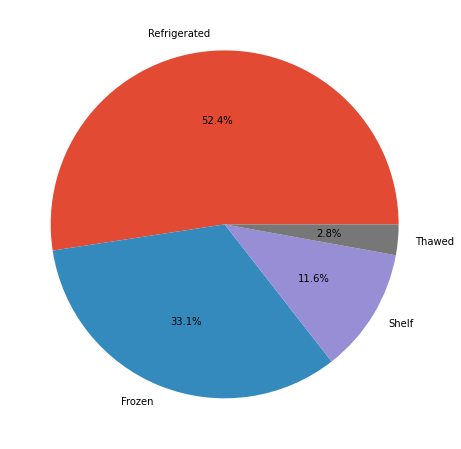

In [191]:
values = df_partner_items['ProductStorage'].value_counts()
labels = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed']
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.show()

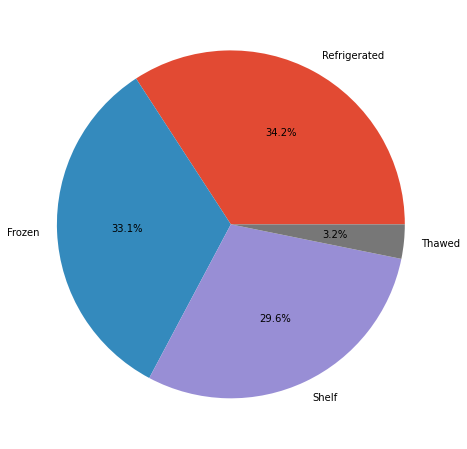

In [192]:
values = df_comm_items['ProductStorage'].value_counts()
labels = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed']
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.show()

### Calculating which is the highest Product Storage Type in each order id

#### From Partner's Side

In [193]:
df_partner_header.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989
1,20052,190050,2000,2021-01-12,FoodieLand,-27.42469,153.01989
2,20053,190050,2000,2021-01-13,FoodieLand,-27.42469,153.01989
3,20054,190050,2000,2021-01-14,FoodieLand,-27.42469,153.01989
4,20055,190050,2000,2021-01-15,FoodieLand,-27.42469,153.01989


In [194]:
df_partner_header[df_partner_header['OrderId'] == 20051]

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989


In [195]:
orderid = list(df_partner_header['OrderId'].values)

In [196]:
for i in range(len(orderid)):
    df_partner_items['ProductType'][i] = df_partner_items[df_partner_items['OrderId'] == orderid[i]]['ProductStorage'].mode()[0]

In [197]:
df_partner_header.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989
1,20052,190050,2000,2021-01-12,FoodieLand,-27.42469,153.01989
2,20053,190050,2000,2021-01-13,FoodieLand,-27.42469,153.01989
3,20054,190050,2000,2021-01-14,FoodieLand,-27.42469,153.01989
4,20055,190050,2000,2021-01-15,FoodieLand,-27.42469,153.01989


In [198]:
df_partner_items['ProductType'].value_counts()

DIARY                1794
VEGETABLES           1163
FRUIT                 869
PROCESSED_MEAT        867
SHELF_ITEM            761
BAKERY                650
FROZEN_ITEM           578
DELI_ITEM             428
SOY                   385
PROCESSED_POULTRY     245
REFRIGERATED          241
SHELLFISH             220
FISH                  193
CONDIMENTS            143
FRESH_POULTRY         108
FRESH_MEAT            106
SMOKEDFISH             90
DOUGH                  89
BAKING                 82
PESTO                  45
PASTA                  39
BEVERAGES              28
FROZEN                 26
COOKIES                21
CRACKERS               20
Name: ProductType, dtype: int64

#### From Customer's Side 

In [199]:
orderid = list(df_comm_header['OrderId'].values)

In [200]:
product_storage = []
for i in range(len(orderid)):
    product_storage.append(df_comm_items[df_comm_items['OrderId'] == orderid[i]]['ProductStorage'].mode()[0])

In [201]:
df_comm_header['Product Type'] = product_storage

In [202]:
df_comm_header['Product Type'].value_counts()

REFRIGERATED    151
FROZEN          135
SHELF           126
Name: Product Type, dtype: int64

In [203]:
df_comm_header.head()

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon,FoodieLandDistance,GrocerTownDistance,LoMarket,Product Type
0,50051,90050,200,2021-01-11,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776,SHELF
1,50052,90050,200,2021-01-18,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776,REFRIGERATED
2,50053,90050,200,2021-01-21,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776,FROZEN
3,50054,90050,200,2021-01-26,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776,SHELF
4,50055,90050,200,2021-01-31,AGA East,Dustin Woods,-27.40559,153.09079,7.323634,11.214479,13.894776,FROZEN


In [204]:
df_comm_header[df_comm_header['Location'] == 'AGA South']['Product Type'].describe(include = 'all').T

count               37
unique               3
top       REFRIGERATED
freq                18
Name: Product Type, dtype: object

In [205]:
df_comm_header['Location'].value_counts()

AGA West     102
AGA North     97
AGA East      88
AGA HQ        88
AGA South     37
Name: Location, dtype: int64

### Insight:
- Products Wanted by each location:
    - AGA North : Refrigerated
    - AGA HQ : Refrigerated
    - AGA West : Frozen
    - AGA East : Shelf
    - AGA South : Refrigerated

- Three of the 5 Locations have request refrigerated items. 
- AGA West and AGA East have requested Frozen and Shelf Items.

In [206]:
loc_clust = df_comm_header.groupby('Location').mean()
loc_clust

,OrderId,CustomerId,OrderTotal,CustomerGeoLat,CustomerGeoLon,FoodieLandDistance,GrocerTownDistance,LoMarket
Location,,,,,,,,
AGA East,50276.159091,90060.625000,200.0,-27.440399,153.010280,7.102417,6.891282,8.434830
AGA HQ,50218.465909,90058.159091,200.0,-27.456651,153.015672,6.897017,7.405663,6.902765
AGA North,50359.597938,90064.680412,200.0,-27.453633,153.001765,6.783975,6.372280,7.279968
AGA South,50236.621622,90058.864865,200.0,-27.455914,153.028549,6.856897,7.907188,9.650916
AGA West,50181.519608,90056.186275,200.0,-27.462966,153.043552,7.689431,10.238079,8.731173


### Insight:
- FoodieLand should donate higher perishable goods than Refrigerated goods to AGA East. LoMarket can provide Refrigerated goods to AGA East.
- LoMarket can donate higher perishable goods to AGA HQ and FoodieLand can provide higher refrigerated goods.
- Almost all three partners can provide equal supply of goods to the AGA North.
- For the AGA South, both FoodieLand and GrocerTown can provide Refrigerated goods and LoMarket can provide perishables.
- Grocer Town should provide higher perishables and Foodieland and LoMarket Refrigerated goods.

---

- However, from previously found location based result the following insights can be derived:
    - AGA North Requires Refrigerated products therefore, almost every partner can deliver the same to the customer.
    - AGA HQ Requires Refrigerated products which can be delivered by the FoodieLand partner who can deliver the refrigerated goods and the other two partners can focus on the perishables.
    - AGA West Requires Frozen Goods which can also be donated by FoodieLand and the extremely perishables by GrocerTown and other goods with a mid to low shelf life by LoMarket.
    - AGA East requires mode Shelf products which are easily perishable products. These can be delivered by either of the three partners.
    - AGA South also requires Refrigerated products which can be delivered by either FoodieLand or GrocerTown depending upon availability and the other perishables can be donated by LoMarket.

In [207]:
df_partner=pd.merge(df_partner_header, df_partner_items, on='OrderId', how='left')

In [208]:
df_partner.isnull().sum()

OrderId                  0
PartnerId                0
OrderTotal               0
OrderDate                0
PartnerName              0
PartnerGeoLat            0
PartnerGeoLon            0
OrderItemId              0
ProductType              0
ProductItem              0
ProductMin            1333
ProductMax            1333
ProductUnit           1333
ProductDescription    8406
ProductStorage           0
Quantity                 0
ProductLife              0
dtype: int64

In [209]:
df_partner.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductStorage,Quantity,ProductLife
0,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989,1,REFRIGERATED,"Cheese, processed slices",1.0,2.0,30.0,NaN,REFRIGERATED,140,60.0
1,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989,2,REFRIGERATED,"Eggs, in shell",3.0,5.0,7.0,NaN,REFRIGERATED,100,35.0
2,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989,3,REFRIGERATED,Margarine,12.0,12.0,30.0,NaN,FROZEN,100,360.0
3,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989,4,REFRIGERATED,"Milk, plain or flavored",1.0,1.0,7.0,NaN,REFRIGERATED,115,7.0
4,20051,190050,2000,2021-01-11,FoodieLand,-27.42469,153.01989,5,REFRIGERATED,Tofu,1.0,1.0,7.0,NaN,REFRIGERATED,110,7.0


### Forecasting Quantities Required by FoodieLand 

In [210]:
fl_ts = df_partner.copy()

In [211]:
fl_ts['ProductStorage'].value_counts()

REFRIGERATED    4817
FROZEN          3045
SHELF           1068
THAWED           261
Name: ProductStorage, dtype: int64

In [212]:
fl_ref = fl_ts[(fl_ts['ProductStorage'] == 'REFRIGERATED') & (fl_ts['PartnerName'] == 'FoodieLand')]
fl_fr = fl_ts[(fl_ts['ProductStorage'] == 'FROZEN') & (fl_ts['PartnerName'] == 'FoodieLand')]
fl_sh = fl_ts[(fl_ts['ProductStorage'] == 'SHELF') & (fl_ts['PartnerName'] == 'FoodieLand')]
fl_th = fl_ts[(fl_ts['ProductStorage'] == 'THAWED') & (fl_ts['PartnerName'] == 'FoodieLand')]

In [213]:
fl_ref = fl_ref.groupby('OrderDate').sum()
fl_fr = fl_fr.groupby('OrderDate').sum()
fl_sh = fl_sh.groupby('OrderDate').sum()
fl_th = fl_th.groupby('OrderDate').sum()

In [214]:
# fl_ref.to_csv('fl_ref.csv')
# fl_fr.to_csv('fl_fr.csv')
# fl_sh.to_csv('fl_sh.csv')
# fl_th.to_csv('fl_th.csv')

In [215]:
fl_ref = fl_ref['Quantity']
fl_fr = fl_fr['Quantity']
fl_sh = fl_sh['Quantity']
fl_th = fl_th['Quantity']

In [216]:
len(fl_ref)

89

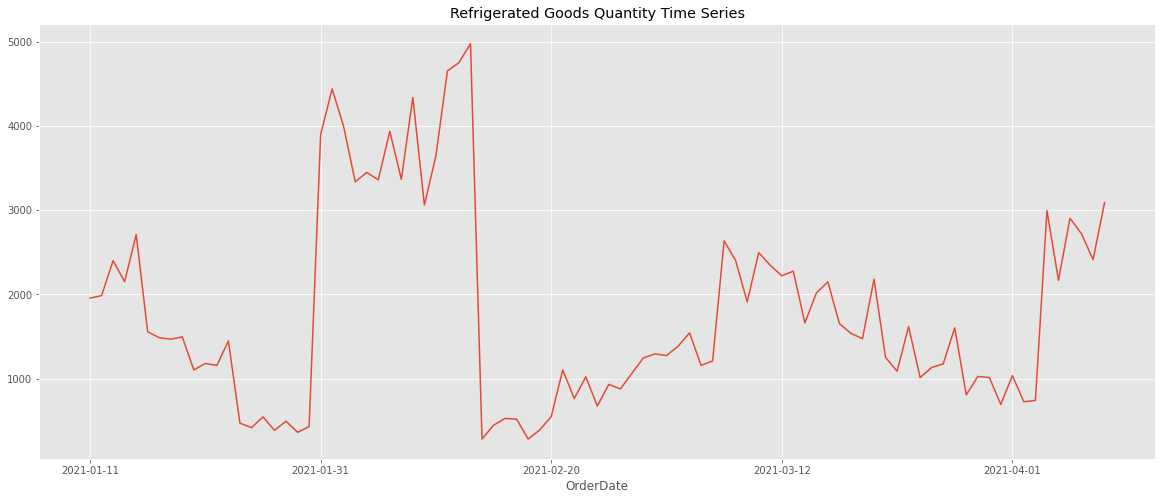

In [217]:
fl_ref.plot()
plt.title('Refrigerated Goods Quantity Time Series');

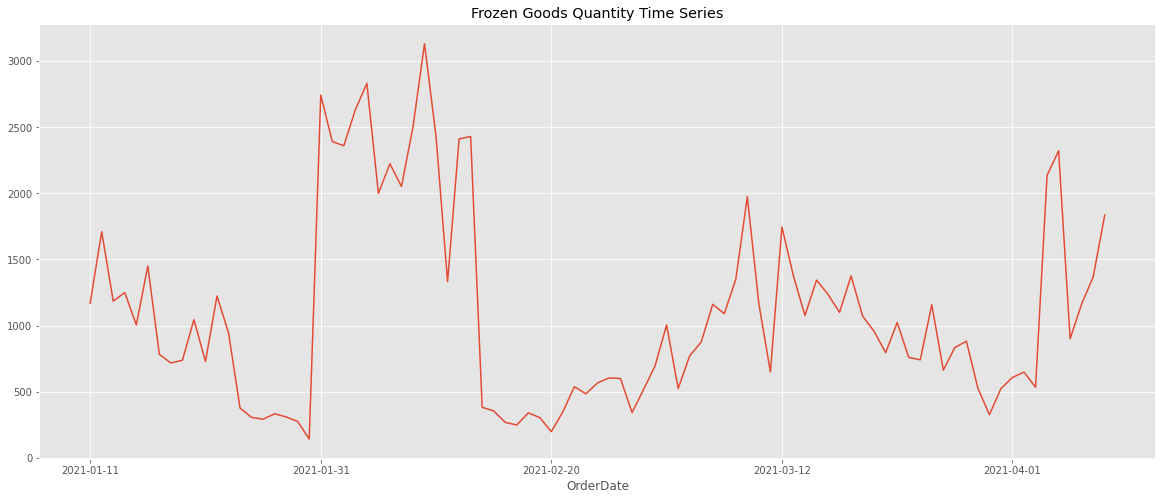

In [218]:
fl_fr.plot()
plt.title('Frozen Goods Quantity Time Series');

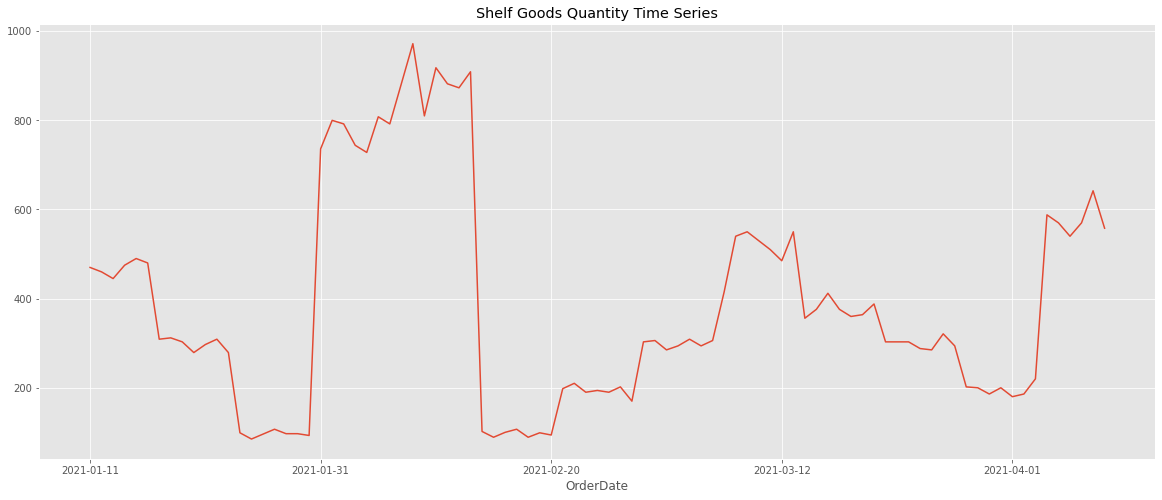

In [219]:
fl_sh.plot()
plt.title('Shelf Goods Quantity Time Series');

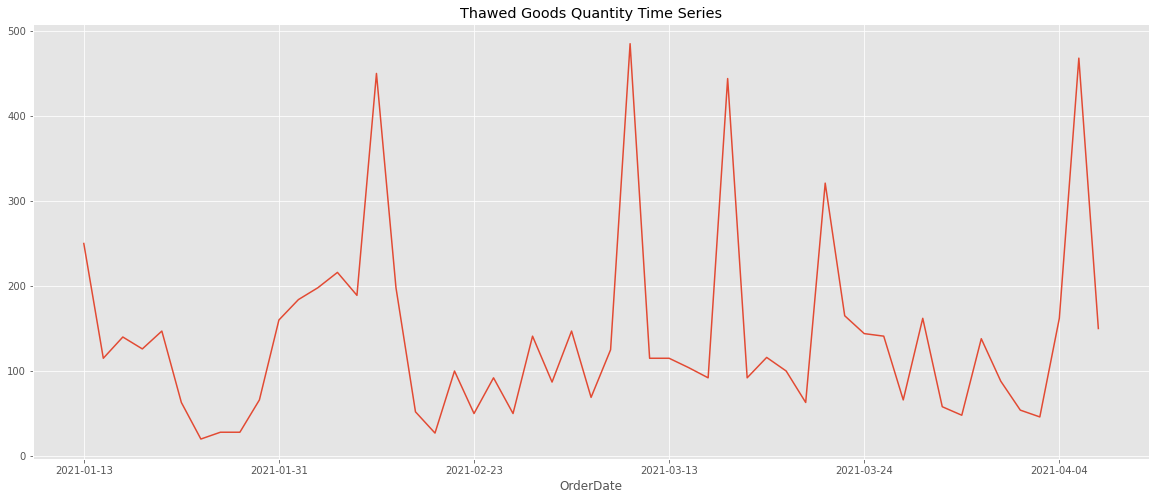

In [220]:
fl_th.plot()
plt.title('Thawed Goods Quantity Time Series');

In [221]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [222]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [223]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+63 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [224]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [225]:
fl_ref = pd.DataFrame(fl_ref)
fl_fr = pd.DataFrame(fl_fr)
fl_sh = pd.DataFrame(fl_sh)
fl_th = pd.DataFrame(fl_th)

In [226]:
rmse_ref_lrm = lrm_forecast(fl_ref, 'Quantity')

RMSE:  732.342114038605
MAPE:  48.022389646611465


In [227]:
rmse_fr_lrm = lrm_forecast(fl_fr, 'Quantity')

RMSE:  486.29071076446655
MAPE:  36.697013418821214


In [228]:
rmse_sh_lrm = lrm_forecast(fl_sh, 'Quantity')

RMSE:  140.3889927139131
MAPE:  39.00548052786751


In [229]:
rmse_th_lrm = lrm_forecast(fl_th, 'Quantity')

RMSE:  119.42985011498882
MAPE:  120.88652922137575


In [256]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(732.342114038605, 486.29071076446655, 140.3889927139131, 119.42985011498882)

### ARIMA 

In [257]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [258]:
test_stationarity(fl_ref)

Results of Dickey-Fuller Test:
Test Statistic                 -3.289499
p-value                         0.015354
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64 

Verdict: 
Time Series is Stationary


In [259]:
test_stationarity(fl_fr)

Results of Dickey-Fuller Test:
Test Statistic                 -2.305722
p-value                         0.170129
#Lags Used                      2.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64 

Verdict: 
Time Series is not Stationary


In [260]:
test_stationarity(fl_sh)

Results of Dickey-Fuller Test:
Test Statistic                 -2.556450
p-value                         0.102336
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64 

Verdict: 
Time Series is not Stationary


In [261]:
test_stationarity(fl_th)

Results of Dickey-Fuller Test:
Test Statistic                 -4.261310
p-value                         0.000518
#Lags Used                      9.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 

Verdict: 
Time Series is Stationary


In [262]:
test_stationarity(fl_fr.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.976730e+00
p-value                        2.167693e-17
#Lags Used                     1.000000e+00
Number of Observations Used    8.600000e+01
Critical Value (1%)           -3.508783e+00
Critical Value (5%)           -2.895784e+00
Critical Value (10%)          -2.585038e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [263]:
test_stationarity(fl_sh.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.247182e+00
p-value                        1.526235e-15
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64 

Verdict: 
Time Series is Stationary


### Insight:
- Differencing of 1 makes the the non-stationary data-sets Shelf and Frozen goods stationary

## ARIMA model for Refrigerated Goods

In [264]:
train = fl_ref[0:int(len(fl_ref)*0.70)]
test = fl_ref[int(len(fl_ref)*0.70):]

In [265]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [266]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [267]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
13,"(1, 1, 1)",1000.629102
4,"(0, 1, 0)",1001.453538
21,"(2, 1, 1)",1002.621918
14,"(1, 1, 2)",1002.622456
5,"(0, 1, 1)",1002.945632


In [268]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  968.1931600268897
MAPE:  77.30598042387726


### ARIMA Model for Frozen Goods

In [269]:
train = fl_fr[0:int(len(fl_fr)*0.70)]
test = fl_fr[int(len(fl_fr)*0.70):]

In [270]:

ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)
    

In [271]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
20,"(2, 1, 0)",948.820375
30,"(3, 1, 2)",949.296431
23,"(2, 1, 3)",949.297475
28,"(3, 1, 0)",950.610614
21,"(2, 1, 1)",950.739284


In [272]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (2,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  534.3038496096038
MAPE:  61.06837821649849


#### ARIMA Model For Shelf Goods

In [273]:
train = fl_sh[0:int(len(fl_sh)*0.70)]
test = fl_sh[int(len(fl_sh)*0.70):]

In [274]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [275]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
4,"(0, 1, 0)",781.483447
13,"(1, 1, 1)",783.353660
5,"(0, 1, 1)",783.481143
12,"(1, 1, 0)",783.481217
22,"(2, 1, 2)",784.571137


In [276]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (0,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  238.96481997395597
MAPE:  81.97859356493345


### ARIMA Model For Thawed Goods 

In [277]:
train = fl_th[0:int(len(fl_th)*0.70)]
test = fl_th[int(len(fl_th)*0.70):]

In [278]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [279]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",449.063611
13,"(1, 1, 1)",449.885528
6,"(0, 1, 2)",449.986691
14,"(1, 1, 2)",451.490806
19,"(2, 0, 3)",451.564575


In [280]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  108.27853842657056
MAPE:  73.15563066260431


In [281]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results1 = pd.DataFrame({'Foodie Land RMSE ARIMA' : rmse_arima, 'Foodie Land RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [282]:
results1

,Foodie Land RMSE ARIMA,Foodie Land RMSE LRM
Refrigerated,968.193160,732.342114
Frozen,534.303850,486.290711
Shelf,238.964820,140.388993
Thawed,108.278538,119.429850


## Forecasting Quantities Required by LoMarket

In [283]:
lm_ts = df_partner.copy()

In [284]:
lm_ts['ProductStorage'].value_counts()

REFRIGERATED    4817
FROZEN          3045
SHELF           1068
THAWED           261
Name: ProductStorage, dtype: int64

In [285]:
lm_ref = lm_ts[(fl_ts['ProductStorage'] == 'REFRIGERATED') & (lm_ts['PartnerName'] == 'LoMarket')]
lm_fr = lm_ts[(fl_ts['ProductStorage'] == 'FROZEN') & (lm_ts['PartnerName'] == 'LoMarket')]
lm_sh = lm_ts[(fl_ts['ProductStorage'] == 'SHELF') & (lm_ts['PartnerName'] == 'LoMarket')]
lm_th = lm_ts[(fl_ts['ProductStorage'] == 'THAWED') & (lm_ts['PartnerName'] == 'LoMarket')]

In [286]:
lm_ref = lm_ref.groupby('OrderDate').sum()
lm_fr = lm_fr.groupby('OrderDate').sum()
lm_sh = lm_sh.groupby('OrderDate').sum()
lm_th = lm_th.groupby('OrderDate').sum()

In [287]:
# lm_ref.to_csv('lm_ref.csv')
# lm_fr.to_csv('lm_fr.csv')
# lm_sh.to_csv('lm_sh.csv')
# lm_th.to_csv('lm_th.csv')

In [288]:
lm_ref = lm_ref['Quantity']
lm_fr = lm_fr['Quantity']
lm_sh = lm_sh['Quantity']
lm_th = lm_th['Quantity']

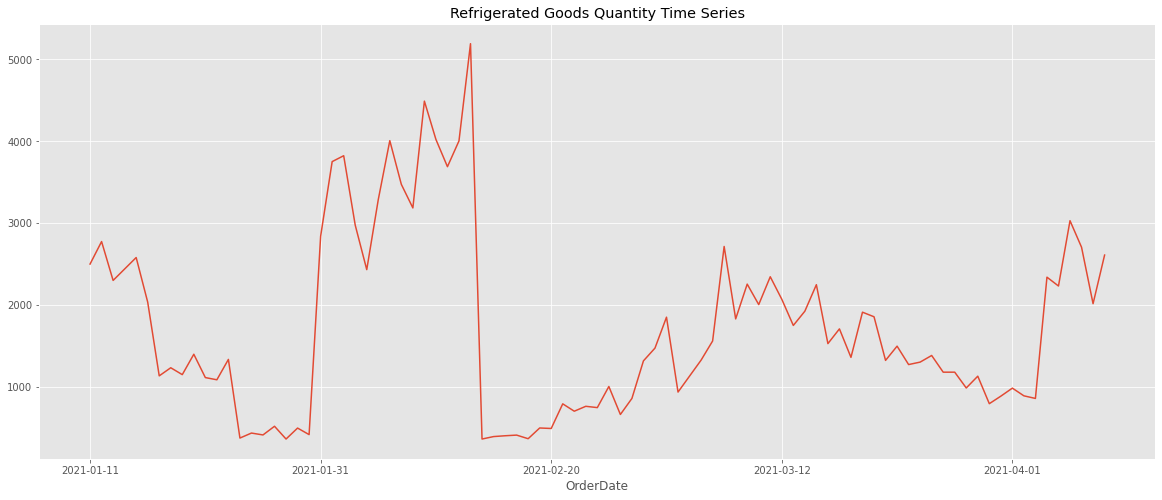

In [289]:
lm_ref.plot()
plt.title('Refrigerated Goods Quantity Time Series');

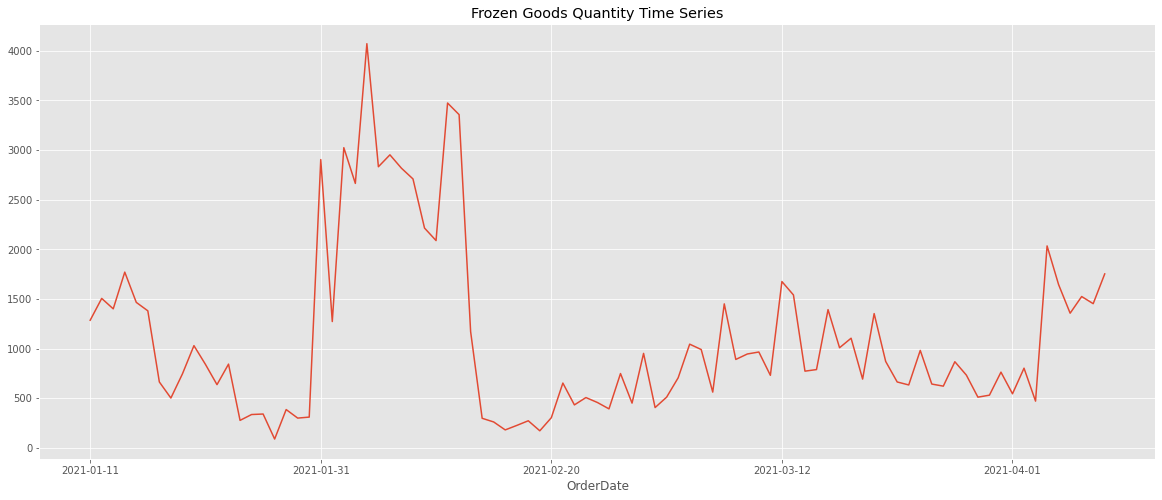

In [290]:
lm_fr.plot()
plt.title('Frozen Goods Quantity Time Series');

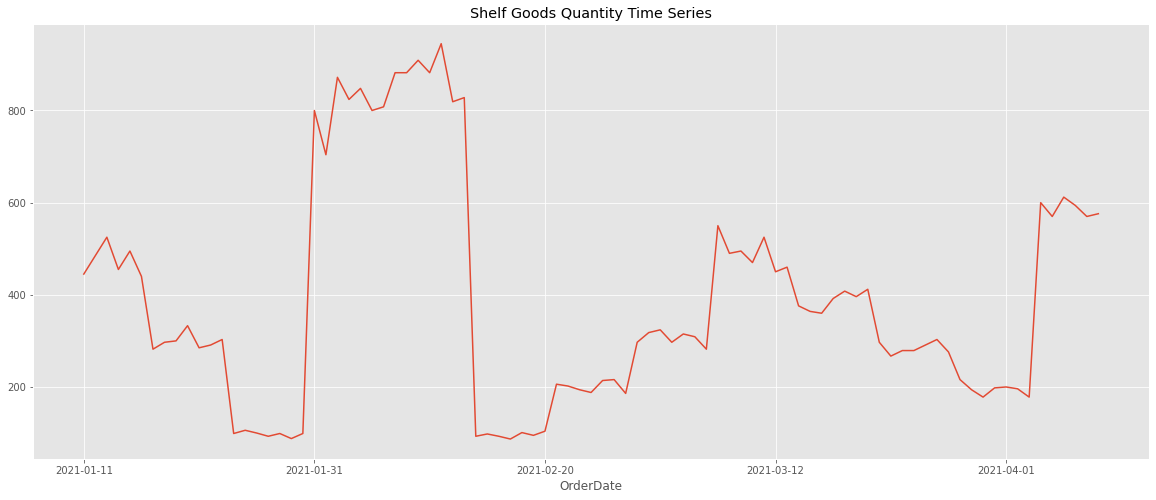

In [291]:
lm_sh.plot()
plt.title('Shelf Goods Quantity Time Series');

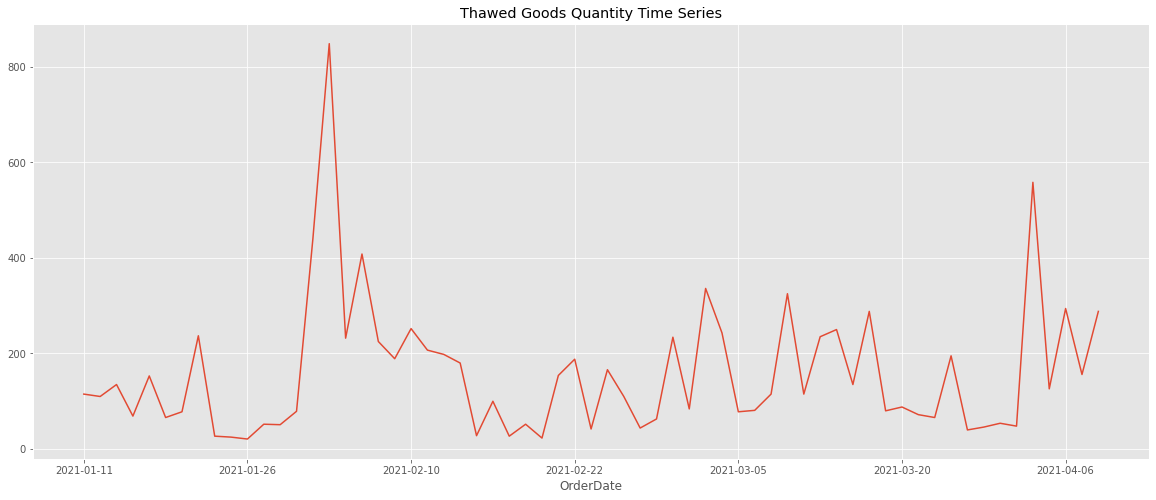

In [292]:
lm_th.plot()
plt.title('Thawed Goods Quantity Time Series');

In [293]:
lm_ref = pd.DataFrame(lm_ref)
lm_fr = pd.DataFrame(lm_fr)
lm_sh = pd.DataFrame(lm_sh)
lm_th = pd.DataFrame(lm_th)

In [294]:
rmse_ref_lrm = lrm_forecast(lm_ref, 'Quantity')

RMSE:  626.339862856713
MAPE:  33.84346334118365


In [295]:
rmse_fr_lrm = lrm_forecast(lm_fr, 'Quantity')

RMSE:  470.77380584508904
MAPE:  32.550955859730344


In [296]:
rmse_sh_lrm = lrm_forecast(lm_sh, 'Quantity')

RMSE:  145.62242226214758
MAPE:  39.850338082319716


In [297]:
rmse_th_lrm = lrm_forecast(lm_th, 'Quantity')

RMSE:  127.05705860967888
MAPE:  105.27762540461165


In [298]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(626.339862856713, 470.77380584508904, 145.62242226214758, 127.05705860967888)

### ARIMA 

In [299]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [300]:
test_stationarity(lm_ref)

Results of Dickey-Fuller Test:
Test Statistic                 -3.311505
p-value                         0.014372
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64 

Verdict: 
Time Series is Stationary


In [301]:
test_stationarity(lm_fr)

Results of Dickey-Fuller Test:
Test Statistic                 -2.524719
p-value                         0.109575
#Lags Used                      1.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64 

Verdict: 
Time Series is not Stationary


In [302]:
test_stationarity(lm_sh)

Results of Dickey-Fuller Test:
Test Statistic                 -2.856578
p-value                         0.050635
#Lags Used                      2.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64 

Verdict: 
Time Series is not Stationary


In [303]:
test_stationarity(lm_th)

Results of Dickey-Fuller Test:
Test Statistic                -5.806014e+00
p-value                        4.514795e-07
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [304]:
test_stationarity(lm_fr.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.343397e+01
p-value                        3.963083e-25
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [305]:
test_stationarity(lm_sh.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.027709e+01
p-value                        3.865153e-18
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [306]:
train = lm_ref[0:int(len(lm_ref)*0.70)]
test = lm_ref[int(len(lm_ref)*0.70):]

In [307]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [308]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [309]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
13,"(1, 1, 1)",995.589853
4,"(0, 1, 0)",996.856849
5,"(0, 1, 1)",997.402422
12,"(1, 1, 0)",997.785202
6,"(0, 1, 2)",998.594991


In [310]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (1,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  629.8137583198765
MAPE:  42.1906137474579


### ARIMA Model for Frozen Goods

In [311]:
train = lm_fr[0:int(len(lm_fr)*0.70)]
test = lm_fr[int(len(lm_fr)*0.70):]

In [312]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [313]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
12,"(1, 1, 0)",966.384192
5,"(0, 1, 1)",967.561367
13,"(1, 1, 1)",967.748421
20,"(2, 1, 0)",968.140864
30,"(3, 1, 2)",968.464653


In [314]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  728.1521830183092
MAPE:  91.94250282730314


#### ARIMA Model For Shelf Goods

In [315]:
train = lm_sh[0:int(len(lm_sh)*0.70)]
test = lm_sh[int(len(lm_sh)*0.70):]

In [316]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [317]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
4,"(0, 1, 0)",782.939553
12,"(1, 1, 0)",784.191615
5,"(0, 1, 1)",784.371316
20,"(2, 1, 0)",784.684034
30,"(3, 1, 2)",784.747553


In [318]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (0,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  177.43042454876658
MAPE:  61.52892464723158


### ARIMA Model For Thawed Goods 

In [319]:
train = lm_th[0:int(len(lm_th)*0.70)]
test = lm_th[int(len(lm_th)*0.70):]

In [320]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)
    

In [321]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
13,"(1, 1, 1)",553.962310
21,"(2, 1, 1)",555.569550
14,"(1, 1, 2)",555.595381
5,"(0, 1, 1)",555.841943
6,"(0, 1, 2)",555.887023


In [322]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (1,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  128.31609039151985
MAPE:  96.39638501247254


In [323]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results2 = pd.DataFrame({'LoMarket RMSE ARIMA' : rmse_arima, 'LoMarket RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [324]:
results2

,LoMarket RMSE ARIMA,LoMarket RMSE LRM
Refrigerated,629.813758,626.339863
Frozen,728.152183,470.773806
Shelf,177.430425,145.622422
Thawed,128.316090,127.057059


## Forecasting Quantities Required by Grocertown

In [325]:
gt_ts = df_partner.copy()

In [326]:
gt_ts['ProductStorage'].value_counts()

REFRIGERATED    4817
FROZEN          3045
SHELF           1068
THAWED           261
Name: ProductStorage, dtype: int64

In [327]:
gt_ref = gt_ts[(gt_ts['ProductStorage'] == 'REFRIGERATED') & (gt_ts['PartnerName'] == 'Grocertown')]
gt_fr = gt_ts[(gt_ts['ProductStorage'] == 'FROZEN') & (gt_ts['PartnerName'] == 'Grocertown')]
gt_sh = gt_ts[(gt_ts['ProductStorage'] == 'SHELF') & (gt_ts['PartnerName'] == 'Grocertown')]
gt_th = gt_ts[(gt_ts['ProductStorage'] == 'THAWED') & (gt_ts['PartnerName'] == 'Grocertown')]

In [328]:
gt_ref = gt_ref.groupby('OrderDate').sum()
gt_fr = gt_fr.groupby('OrderDate').sum()
gt_sh = gt_sh.groupby('OrderDate').sum()
gt_th = gt_th.groupby('OrderDate').sum()

In [329]:
# gt_ref.to_csv('gt_ref.csv')
# gt_fr.to_csv('gt_fr.csv')
# gt_sh.to_csv('gt_sh.csv')
# gt_th.to_csv('gt_th.csv')

In [330]:
gt_ref = gt_ref['Quantity']
gt_fr = gt_fr['Quantity']
gt_sh = gt_sh['Quantity']
gt_th = gt_th['Quantity']

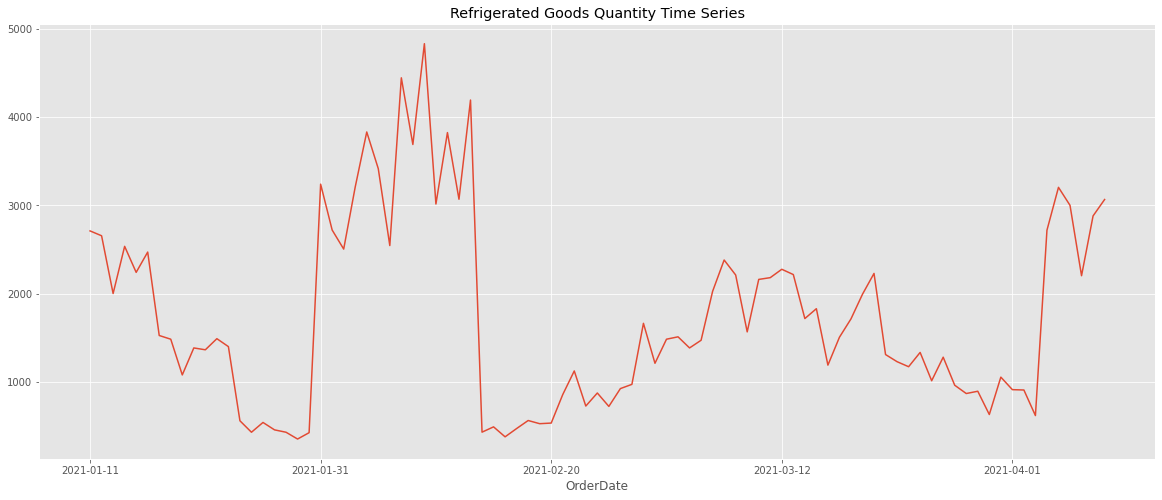

In [331]:
gt_ref.plot()
plt.title('Refrigerated Goods Quantity Time Series');

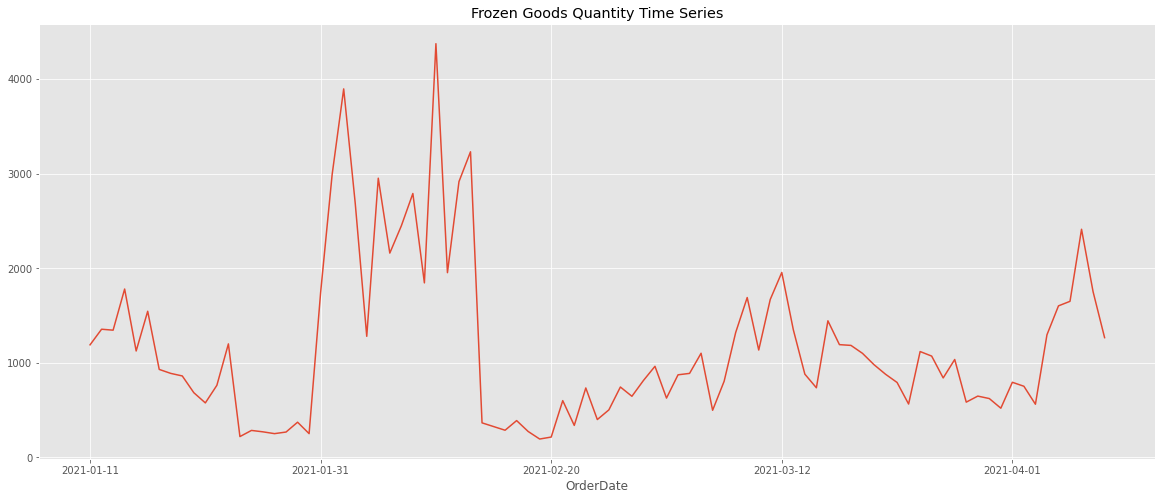

In [332]:
gt_fr.plot()
plt.title('Frozen Goods Quantity Time Series');

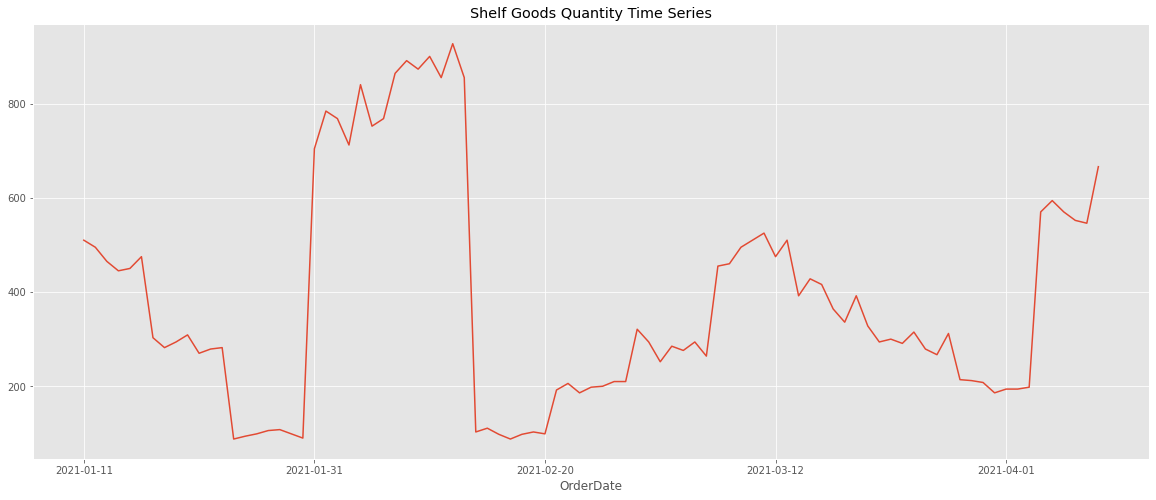

In [333]:
gt_sh.plot()
plt.title('Shelf Goods Quantity Time Series');

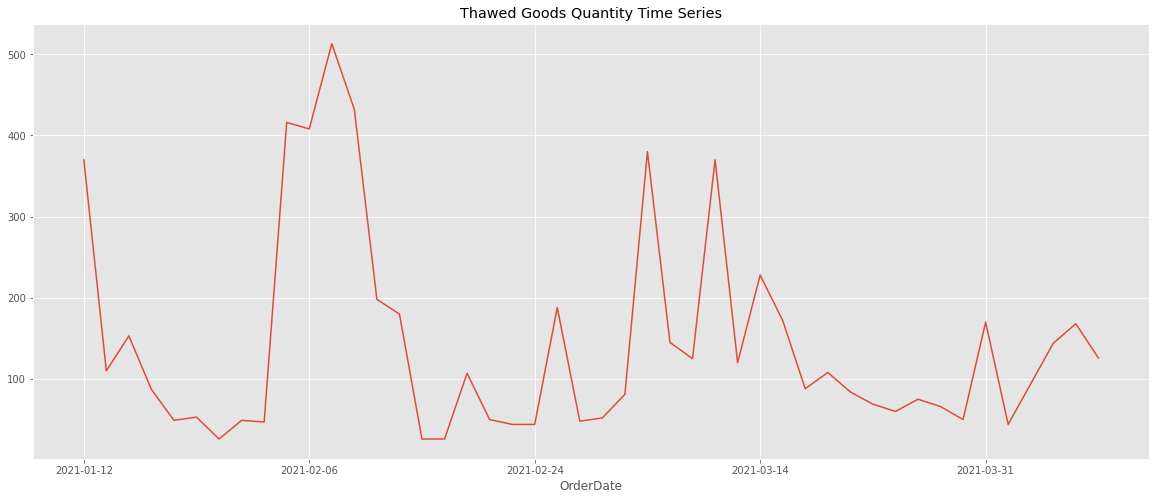

In [334]:
gt_th.plot()
plt.title('Thawed Goods Quantity Time Series');

In [335]:
gt_ref = pd.DataFrame(gt_ref)
gt_fr = pd.DataFrame(gt_fr)
gt_sh = pd.DataFrame(gt_sh)
gt_th = pd.DataFrame(gt_th)

In [336]:
rmse_ref_lrm = lrm_forecast(gt_ref, 'Quantity')

RMSE:  792.760102160212
MAPE:  47.13058845896734


In [337]:
rmse_fr_lrm = lrm_forecast(gt_fr, 'Quantity')

RMSE:  443.13762155296894
MAPE:  36.66918429112991


In [338]:
rmse_sh_lrm = lrm_forecast(gt_sh, 'Quantity')

RMSE:  142.30360499244046
MAPE:  36.8361826053459


In [339]:
rmse_th_lrm = lrm_forecast(gt_th, 'Quantity')

RMSE:  75.15444842752237
MAPE:  98.1153883343844


In [340]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(792.760102160212, 443.13762155296894, 142.30360499244046, 75.15444842752237)

### ARIMA 

In [341]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [342]:
test_stationarity(lm_ref)

Results of Dickey-Fuller Test:
Test Statistic                 -3.311505
p-value                         0.014372
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64 

Verdict: 
Time Series is Stationary


In [343]:
test_stationarity(lm_fr)

Results of Dickey-Fuller Test:
Test Statistic                 -2.524719
p-value                         0.109575
#Lags Used                      1.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64 

Verdict: 
Time Series is not Stationary


In [344]:
test_stationarity(lm_sh)

Results of Dickey-Fuller Test:
Test Statistic                 -2.856578
p-value                         0.050635
#Lags Used                      2.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64 

Verdict: 
Time Series is not Stationary


In [345]:
test_stationarity(lm_th)

Results of Dickey-Fuller Test:
Test Statistic                -5.806014e+00
p-value                        4.514795e-07
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [346]:
test_stationarity(lm_fr.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.343397e+01
p-value                        3.963083e-25
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [347]:
test_stationarity(lm_sh.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.027709e+01
p-value                        3.865153e-18
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [348]:
train = gt_ref[0:int(len(gt_ref)*0.70)]
test = gt_ref[int(len(gt_ref)*0.70):]

In [349]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [350]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [351]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
12,"(1, 1, 0)",986.160475
13,"(1, 1, 1)",986.680337
30,"(3, 1, 2)",987.269184
5,"(0, 1, 1)",987.497271
20,"(2, 1, 0)",988.002492


In [352]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  996.3791025370924
MAPE:  82.33173272866924


### ARIMA Model for Frozen Goods

In [353]:
train = gt_fr[0:int(len(gt_fr)*0.70)]
test = gt_fr[int(len(gt_fr)*0.70):]

In [354]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [355]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
21,"(2, 1, 1)",981.555294
30,"(3, 1, 2)",982.264613
22,"(2, 1, 2)",982.890202
31,"(3, 1, 3)",983.038559
29,"(3, 1, 1)",983.177915


In [356]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (2,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  658.870686632697
MAPE:  75.14833012981576


#### ARIMA Model For Shelf Goods

In [357]:
train = gt_sh[0:int(len(gt_sh)*0.70)]
test = gt_sh[int(len(gt_sh)*0.70):]

In [358]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [359]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
4,"(0, 1, 0)",775.152378
5,"(0, 1, 1)",777.007939
12,"(1, 1, 0)",777.025103
31,"(3, 1, 3)",777.809019
13,"(1, 1, 1)",778.001735


In [360]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (0,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  207.96972714173427
MAPE:  71.1733723660406


### ARIMA Model For Thawed Goods 

In [361]:
train = gt_th[0:int(len(gt_th)*0.70)]
test = gt_th[int(len(gt_th)*0.70):]

In [362]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Quantity'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [363]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
12,"(1, 1, 0)",397.257521
5,"(0, 1, 1)",397.430257
4,"(0, 1, 0)",398.088536
31,"(3, 1, 3)",398.164399
6,"(0, 1, 2)",399.117082


In [364]:
ARIMA_model = ARIMA(train['Quantity'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  97.83579015403542
MAPE:  128.08413515744718


In [365]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results3 = pd.DataFrame({'Grocertown RMSE ARIMA' : rmse_arima, 'Grocertown RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [366]:
results3

,Grocertown RMSE ARIMA,Grocertown RMSE LRM
Refrigerated,996.379103,792.760102
Frozen,658.870687,443.137622
Shelf,207.969727,142.303605
Thawed,97.835790,75.154448


In [367]:
tot_results_partner=pd.concat([results1,results2,results3], axis=1)

In [368]:
tot_results_partner

,Foodie Land RMSE ARIMA,Foodie Land RMSE LRM,LoMarket RMSE ARIMA,LoMarket RMSE LRM,Grocertown RMSE ARIMA,Grocertown RMSE LRM
Refrigerated,968.193160,732.342114,629.813758,626.339863,996.379103,792.760102
Frozen,534.303850,486.290711,728.152183,470.773806,658.870687,443.137622
Shelf,238.964820,140.388993,177.430425,145.622422,207.969727,142.303605
Thawed,108.278538,119.429850,128.316090,127.057059,97.835790,75.154448


## COMMUNITY REQUESTS

In [595]:
df_comm_items['ProductUnit']= df_comm_items['ProductUnit'].replace({'month':30,'week':7,'day':1, 'year':365, 'hour':0.0416})

In [596]:
df_comm_items[df_comm_items['ProductUnit']=='hour']

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,ProductLife


In [597]:
df_comm_items['ProductUnit'].value_counts()

30.0000     2888
1.0000      1325
7.0000       690
365.0000     352
0.0416        43
Name: ProductUnit, dtype: int64

In [598]:
df_comm_items['ProductMax']=df_comm_items['ProductMax'].fillna(df_comm_items['ProductMin'])

In [599]:
df_comm_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,ProductLife
0,50051,1,SHELF_ITEM,"Gelatin, flavored",18.0,18.0,30.0,NaN,unopened,SHELF,540.0
1,50051,2,CONDIMENTS,"Salsa, picante & taco sauces",12.0,12.0,30.0,NaN,unopened,SHELF,360.0
2,50051,3,BAKERY,"Croissants, butter",1.0,1.0,7.0,NaN,NaN,REFRIGERATED,7.0
3,50051,4,SHELF_ITEM,"Jerky, homemade",1.0,2.0,30.0,NaN,opened,REFRIGERATED,60.0
5,50051,6,VEGETABLES,Eggplant,6.0,8.0,30.0,NaN,NaN,FROZEN,240.0


In [600]:
df_comm_items.isnull().sum()

OrderId                  0
OrderItemId              0
ProductType              0
ProductItem              0
ProductMin               0
ProductMax               0
ProductUnit              0
ProductDescription    5268
ProductDetails        3155
ProductStorage           0
ProductLife              0
dtype: int64

In [601]:
df_comm_items = df_comm_items[df_comm_items['ProductMin'].notna()]

In [602]:
df_comm_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,ProductLife
0,50051,1,SHELF_ITEM,"Gelatin, flavored",18.0,18.0,30.0,NaN,unopened,SHELF,540.0
1,50051,2,CONDIMENTS,"Salsa, picante & taco sauces",12.0,12.0,30.0,NaN,unopened,SHELF,360.0
2,50051,3,BAKERY,"Croissants, butter",1.0,1.0,7.0,NaN,NaN,REFRIGERATED,7.0
3,50051,4,SHELF_ITEM,"Jerky, homemade",1.0,2.0,30.0,NaN,opened,REFRIGERATED,60.0
5,50051,6,VEGETABLES,Eggplant,6.0,8.0,30.0,NaN,NaN,FROZEN,240.0


In [603]:
df_comm_items.isnull().sum()

OrderId                  0
OrderItemId              0
ProductType              0
ProductItem              0
ProductMin               0
ProductMax               0
ProductUnit              0
ProductDescription    5268
ProductDetails        3155
ProductStorage           0
ProductLife              0
dtype: int64

In [604]:
df_comm_items.shape

(5298, 11)

In [605]:
df_comm_items['ProductLife']= round(df_comm_items['ProductMax']*df_comm_items['ProductUnit'])

In [606]:
df_comm_items.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductMin,ProductMax,ProductUnit,ProductDescription,ProductDetails,ProductStorage,ProductLife
0,50051,1,SHELF_ITEM,"Gelatin, flavored",18.0,18.0,30.0,NaN,unopened,SHELF,540.0
1,50051,2,CONDIMENTS,"Salsa, picante & taco sauces",12.0,12.0,30.0,NaN,unopened,SHELF,360.0
2,50051,3,BAKERY,"Croissants, butter",1.0,1.0,7.0,NaN,NaN,REFRIGERATED,7.0
3,50051,4,SHELF_ITEM,"Jerky, homemade",1.0,2.0,30.0,NaN,opened,REFRIGERATED,60.0
5,50051,6,VEGETABLES,Eggplant,6.0,8.0,30.0,NaN,NaN,FROZEN,240.0


In [607]:
df_comm=pd.merge(df_comm_header, df_comm_items, on='OrderId', how='left')

In [608]:
df_comm.head().T

,0,1,2,3,4
OrderId,50051,50051,50051,50051,50051
CustomerId,90050,90050,90050,90050,90050
OrderTotal,200,200,200,200,200
OrderDate,2021-01-11,2021-01-11,2021-01-11,2021-01-11,2021-01-11
Location,AGA East,AGA East,AGA East,AGA East,AGA East
CustomerName,Dustin Woods,Dustin Woods,Dustin Woods,Dustin Woods,Dustin Woods
CustomerGeoLat,-27.40559,-27.40559,-27.40559,-27.40559,-27.40559
CustomerGeoLon,153.09079,153.09079,153.09079,153.09079,153.09079
FoodieLandDistance,7.323634,7.323634,7.323634,7.323634,7.323634
GrocerTownDistance,11.214479,11.214479,11.214479,11.214479,11.214479


In [609]:
df_comm.CustomerName.value_counts()

Amy Davis           393
Keith Massey        380
Jason Carter        374
Jennifer White      338
Kylie Lucas         333
Kendra Garrison     323
Joshua Goodman      286
David Welch         273
Daniel Everett      267
April Garrett       267
Jesse Mcdonald      252
Richard Griffith    247
Dustin Woods        228
Tammy Murray        223
Joseph Lewis        209
Jacob Klein         203
Robert Ho           202
Hunter Farrell      174
Emily Gonzalez      169
Sheryl Hall         157
Name: CustomerName, dtype: int64

In [610]:
# df_comm['Quantity']=df_comm['CustomerName'].value_counts()*df_comm['OrderTotal']

In [611]:
df_comm.head().T

,0,1,2,3,4
OrderId,50051,50051,50051,50051,50051
CustomerId,90050,90050,90050,90050,90050
OrderTotal,200,200,200,200,200
OrderDate,2021-01-11,2021-01-11,2021-01-11,2021-01-11,2021-01-11
Location,AGA East,AGA East,AGA East,AGA East,AGA East
CustomerName,Dustin Woods,Dustin Woods,Dustin Woods,Dustin Woods,Dustin Woods
CustomerGeoLat,-27.40559,-27.40559,-27.40559,-27.40559,-27.40559
CustomerGeoLon,153.09079,153.09079,153.09079,153.09079,153.09079
FoodieLandDistance,7.323634,7.323634,7.323634,7.323634,7.323634
GrocerTownDistance,11.214479,11.214479,11.214479,11.214479,11.214479


In [612]:
df_comm.Location.value_counts()

AGA West     1319
AGA North    1243
AGA East     1162
AGA HQ       1133
AGA South     441
Name: Location, dtype: int64

### AGA West

In [613]:
we_ts = df_comm.copy()

In [614]:
we_ref = we_ts[(we_ts['ProductStorage'] == 'REFRIGERATED') & (we_ts['Location'] == 'AGA West')]
we_fr = we_ts[(we_ts['ProductStorage'] == 'FROZEN') & (we_ts['Location'] == 'AGA West')]
we_sh = we_ts[(we_ts['ProductStorage'] == 'SHELF') & (we_ts['Location'] == 'AGA West')]
we_th = we_ts[(we_ts['ProductStorage'] == 'THAWED') & (we_ts['Location'] == 'AGA West')]

In [615]:
we_ref = we_ref.groupby('OrderDate').sum()
we_fr = we_fr.groupby('OrderDate').sum()
we_sh = we_sh.groupby('OrderDate').sum()
we_th = we_th.groupby('OrderDate').sum()

In [616]:
we_ref = we_ref['OrderTotal']
we_fr = we_fr['OrderTotal']
we_sh = we_sh['OrderTotal']
we_th = we_th['OrderTotal']

In [617]:
# we_ref.to_csv('we_ref.csv')
# we_fr.to_csv('we_fr.csv')
# we_sh.to_csv('we_sh.csv')
# we_th.to_csv('we_th.csv')

<AxesSubplot:xlabel='OrderDate'>

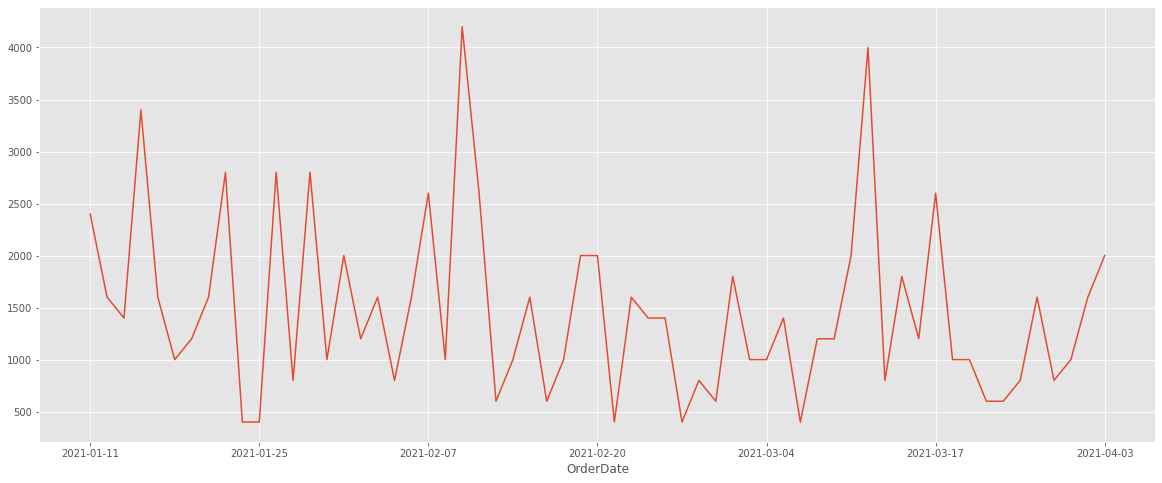

In [618]:
we_ref.plot()

<AxesSubplot:xlabel='OrderDate'>

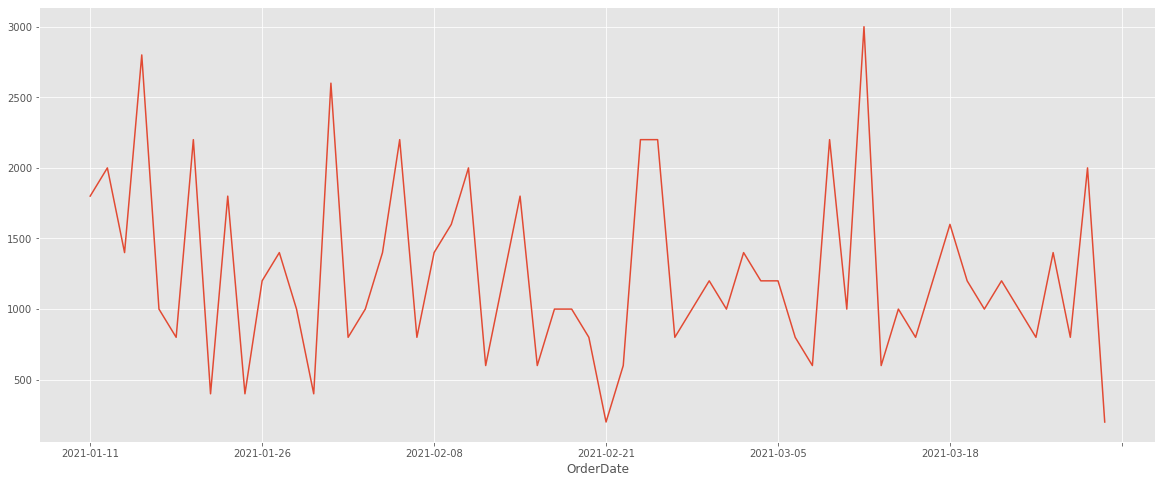

In [619]:
we_fr.plot()

<AxesSubplot:xlabel='OrderDate'>

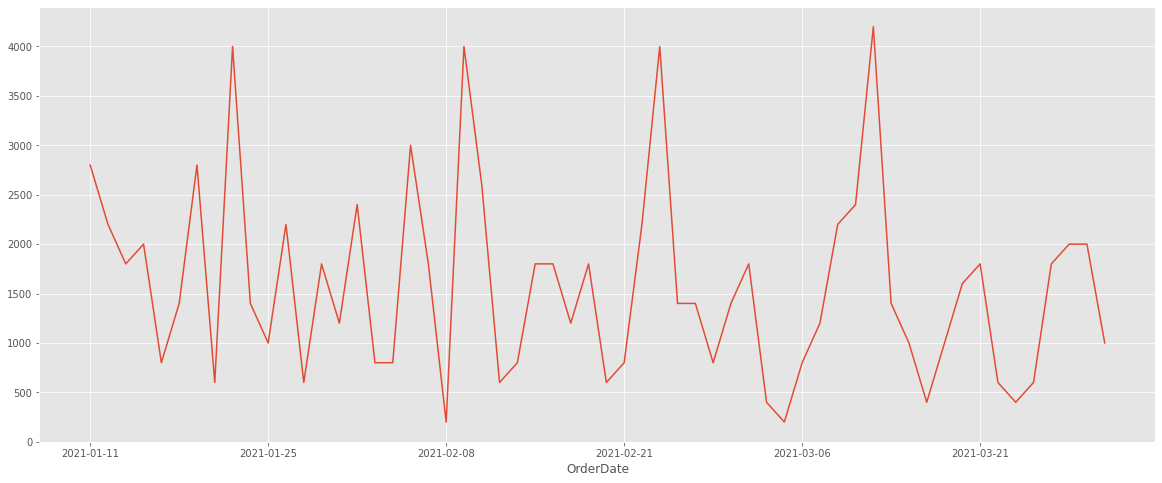

In [620]:
we_sh.plot()

<AxesSubplot:xlabel='OrderDate'>

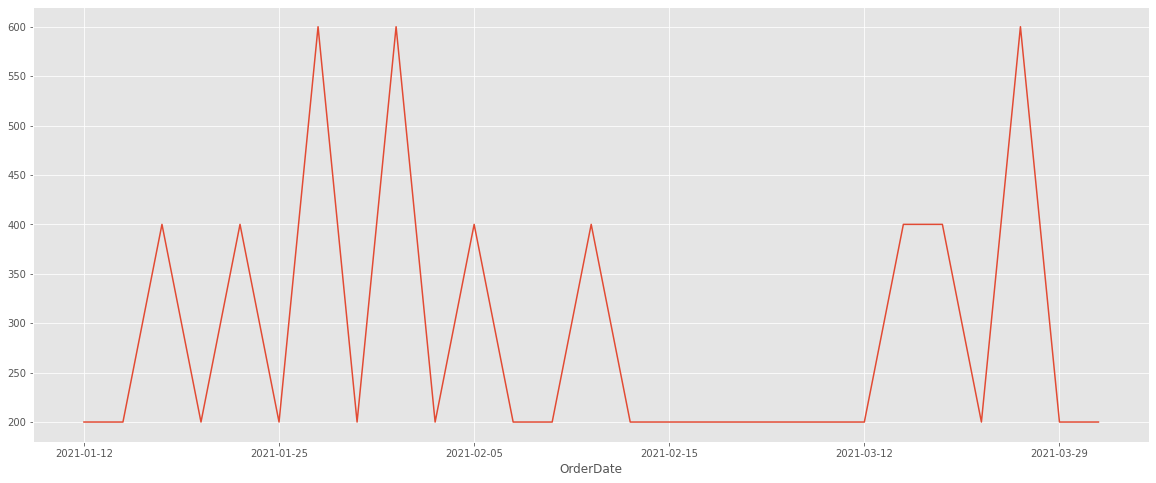

In [621]:
we_th.plot()

In [622]:
we_ref = pd.DataFrame(we_ref)
we_fr = pd.DataFrame(we_fr)
we_sh = pd.DataFrame(we_sh)
we_th = pd.DataFrame(we_th)

In [623]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [624]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [625]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+43 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [626]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [627]:
rmse_ref_lrm = lrm_forecast(we_ref, 'OrderTotal')

RMSE:  941.1193970598391
MAPE:  40.667643512599774


In [628]:
rmse_fr_lrm = lrm_forecast(we_fr, 'OrderTotal')

RMSE:  688.8729133426372
MAPE:  46.46244028759627


In [629]:
rmse_sh_lrm = lrm_forecast(we_sh, 'OrderTotal')

RMSE:  981.4527548850093
MAPE:  52.71799707368814


In [630]:
rmse_th_lrm = lrm_forecast(we_th, 'OrderTotal')

RMSE:  220.234281243129
MAPE:  51.46708455961981


In [631]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(941.1193970598391, 688.8729133426372, 981.4527548850093, 220.234281243129)

## ARIMA model for Refrigerated Goods

In [632]:
train = we_ref[0:int(len(we_ref)*0.70)]
test = we_ref[int(len(we_ref)*0.70):]

In [633]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [634]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [635]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",677.183266
6,"(0, 1, 2)",678.504582
13,"(1, 1, 1)",678.615617
21,"(2, 1, 1)",680.262852
7,"(0, 1, 3)",680.324037


In [636]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  831.0786642924755
MAPE:  56.674016328444345


### ARIMA Model for Frozen Goods

In [637]:
train = we_fr[0:int(len(we_fr)*0.70)]
test = we_fr[int(len(we_fr)*0.70):]

In [638]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [639]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",651.777850
6,"(0, 1, 2)",652.586158
13,"(1, 1, 1)",652.781273
23,"(2, 1, 3)",653.141951
21,"(2, 1, 1)",654.232224


In [640]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  644.8169356954256
MAPE:  66.3227014760667


#### ARIMA Model For Shelf Goods

In [641]:
train = we_sh[0:int(len(we_sh)*0.70)]
test = we_sh[int(len(we_sh)*0.70):]

In [642]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [643]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
7,"(0, 1, 3)",653.829285
5,"(0, 1, 1)",655.796257
21,"(2, 1, 1)",656.604409
6,"(0, 1, 2)",656.859581
15,"(1, 1, 3)",656.994831


In [644]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,3)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  1049.0431979317007
MAPE:  87.34422517404722


### ARIMA Model For Thawed Goods 

In [645]:
train = we_th[0:int(len(we_th)*0.70)]
test = we_th[int(len(we_th)*0.70):]

In [646]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [647]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
12,"(1, 1, 0)",214.865955
20,"(2, 1, 0)",215.811935
13,"(1, 1, 1)",215.981550
21,"(2, 1, 1)",217.459902
28,"(3, 1, 0)",217.739074


In [648]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  163.29931618554522
MAPE:  18.51851851851852


In [649]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results1_comm = pd.DataFrame({'AGA WEST RMSE ARIMA' : rmse_arima, 'AGA WEST RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [650]:
results1_comm

,AGA WEST RMSE ARIMA,AGA WEST RMSE LRM
Refrigerated,831.078664,941.119397
Frozen,644.816936,688.872913
Shelf,1049.043198,981.452755
Thawed,163.299316,220.234281


### AGA East

In [651]:
ea_ts = df_comm.copy()

In [652]:
ea_ref = ea_ts[(ea_ts['ProductStorage'] == 'REFRIGERATED') & (ea_ts['Location'] == 'AGA East')]
ea_fr = ea_ts[(ea_ts['ProductStorage'] == 'FROZEN') & (ea_ts['Location'] == 'AGA East')]
ea_sh = ea_ts[(ea_ts['ProductStorage'] == 'SHELF') & (ea_ts['Location'] == 'AGA East')]
ea_th = ea_ts[(ea_ts['ProductStorage'] == 'THAWED') & (ea_ts['Location'] == 'AGA East')]

In [653]:
ea_ref = ea_ref.groupby('OrderDate').sum()
ea_fr = ea_fr.groupby('OrderDate').sum()
ea_sh = ea_sh.groupby('OrderDate').sum()
ea_th = ea_th.groupby('OrderDate').sum()

In [654]:
ea_ref = ea_ref['OrderTotal']
ea_fr = ea_fr['OrderTotal']
ea_sh = ea_sh['OrderTotal']
ea_th = ea_th['OrderTotal']

In [655]:
# ea_ref.to_csv('ea_ref.csv')
# ea_fr.to_csv('ea_fr.csv')
# ea_sh.to_csv('ea_sh.csv')
# ea_th.to_csv('ea_th.csv')

<AxesSubplot:xlabel='OrderDate'>

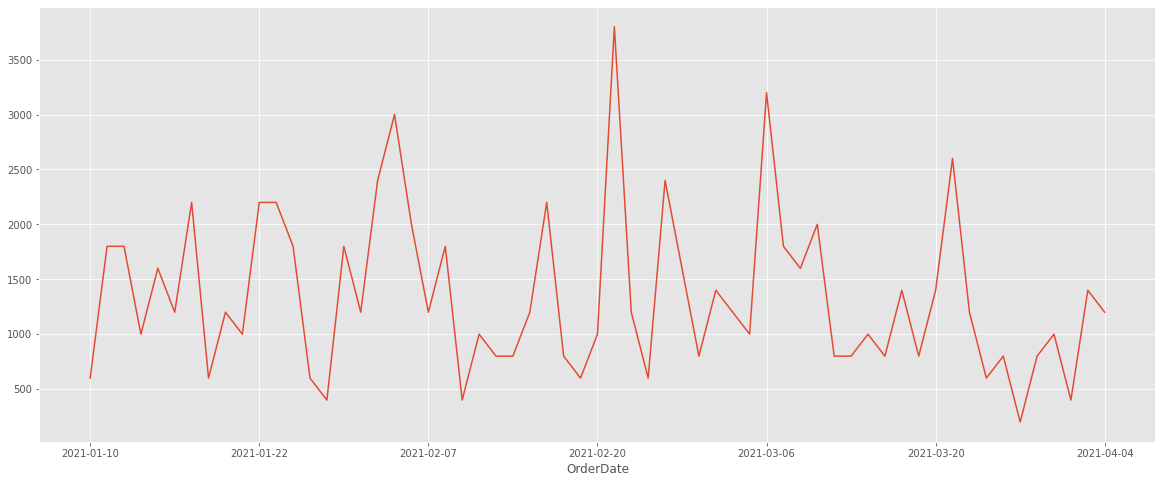

In [656]:
ea_ref.plot()

<AxesSubplot:xlabel='OrderDate'>

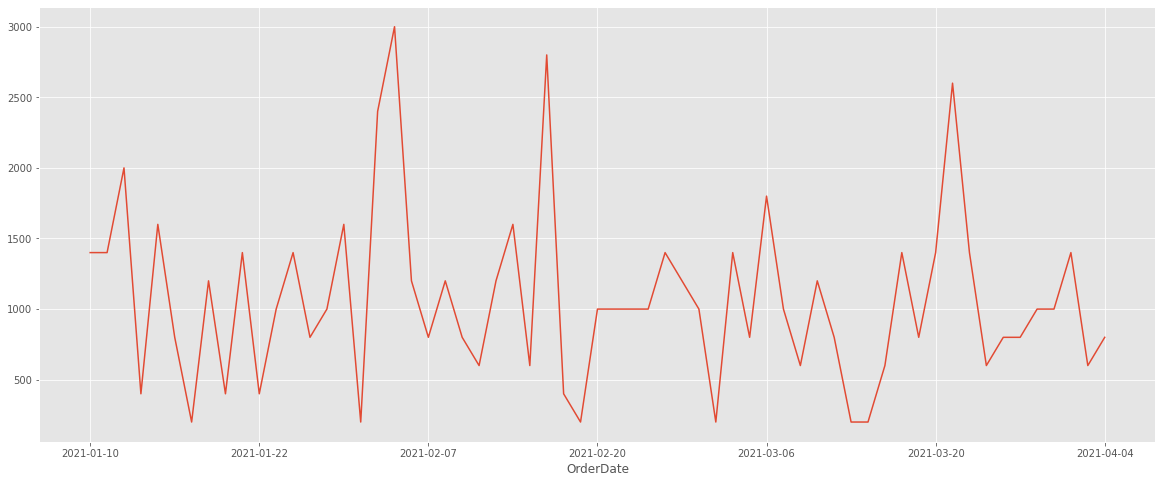

In [657]:
ea_fr.plot()

<AxesSubplot:xlabel='OrderDate'>

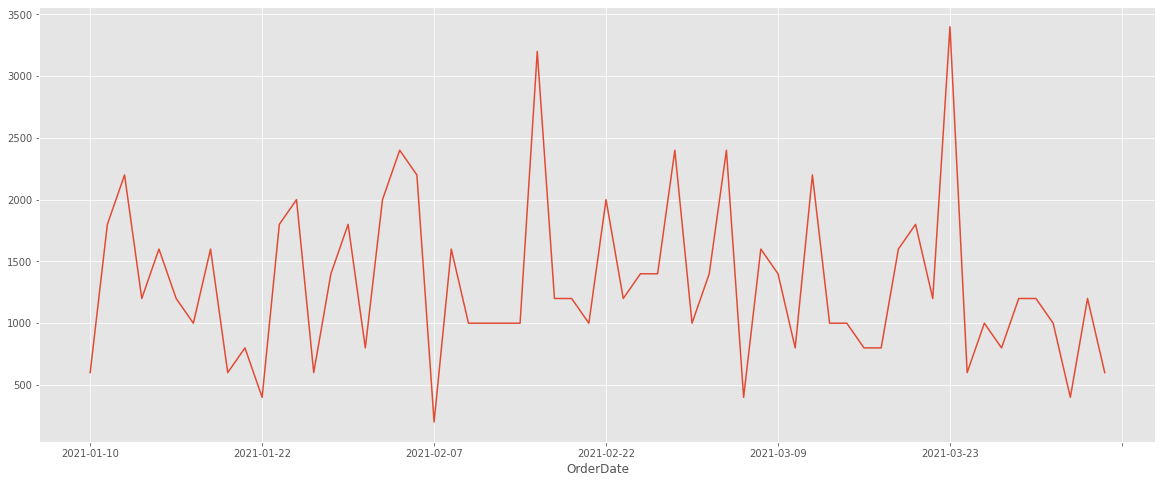

In [658]:
ea_sh.plot()

<AxesSubplot:xlabel='OrderDate'>

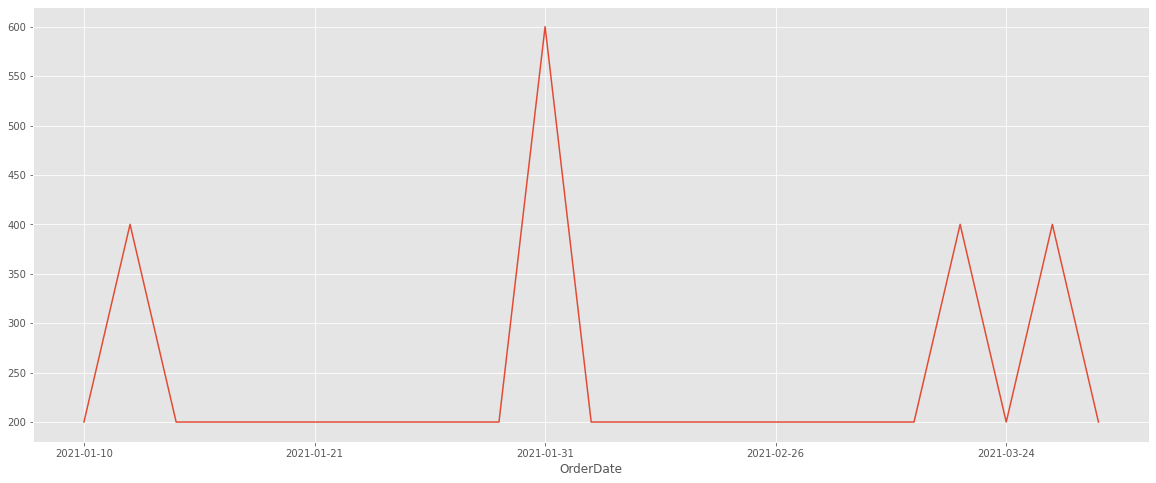

In [659]:
ea_th.plot()

In [660]:
ea_ref = pd.DataFrame(ea_ref)
ea_fr = pd.DataFrame(ea_fr)
ea_sh = pd.DataFrame(ea_sh)
ea_th = pd.DataFrame(ea_th)

In [661]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [662]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+43 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [663]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [664]:
rmse_ref_lrm = lrm_forecast(ea_ref, 'OrderTotal')

RMSE:  765.8094301337998
MAPE:  111.74843940376249


In [665]:
rmse_fr_lrm = lrm_forecast(ea_fr, 'OrderTotal')

RMSE:  541.589517676154
MAPE:  80.27554042461561


In [666]:
rmse_sh_lrm = lrm_forecast(ea_sh, 'OrderTotal')

RMSE:  736.3430053196317
MAPE:  68.04673812729747


In [667]:
rmse_th_lrm = lrm_forecast(ea_th, 'OrderTotal')

RMSE:  105.10845797891288
MAPE:  15.735294117647053


In [668]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(765.8094301337998, 541.589517676154, 736.3430053196317, 105.10845797891288)

### ARIMA 

In [669]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [670]:
test_stationarity(ea_ref)

Results of Dickey-Fuller Test:
Test Statistic                -6.830870e+00
p-value                        1.895215e-09
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [671]:
test_stationarity(ea_fr)

Results of Dickey-Fuller Test:
Test Statistic                -7.640391e+00
p-value                        1.902785e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [672]:
test_stationarity(ea_sh)

Results of Dickey-Fuller Test:
Test Statistic                -8.756203e+00
p-value                        2.751127e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [673]:
test_stationarity(ea_th)

Results of Dickey-Fuller Test:
Test Statistic                 -4.913626
p-value                         0.000033
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [674]:
train = ea_ref[0:int(len(ea_ref)*0.70)]
test = ea_ref[int(len(ea_ref)*0.70):]

In [675]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [676]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [677]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",671.209409
6,"(0, 1, 2)",672.950509
7,"(0, 1, 3)",672.995631
21,"(2, 1, 1)",673.038725
13,"(1, 1, 1)",673.056157


In [678]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  652.4997547376655
MAPE:  91.43848261799047


### ARIMA Model for Frozen Goods

In [679]:
train = ea_fr[0:int(len(ea_fr)*0.70)]
test = ea_fr[int(len(ea_fr)*0.70):]

In [680]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [681]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",654.105980
6,"(0, 1, 2)",655.603529
13,"(1, 1, 1)",655.621891
14,"(1, 1, 2)",657.427854
21,"(2, 1, 1)",657.585271


In [682]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  549.9407970056603
MAPE:  84.53963748599514


#### ARIMA Model For Shelf Goods

In [683]:
train = ea_sh[0:int(len(ea_sh)*0.70)]
test = ea_sh[int(len(ea_sh)*0.70):]

In [684]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [685]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",655.255213
6,"(0, 1, 2)",656.175627
13,"(1, 1, 1)",656.514671
14,"(1, 1, 2)",656.813644
21,"(2, 1, 1)",657.283923


In [686]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  698.927522085004
MAPE:  58.232988694356315


### ARIMA Model For Thawed Goods 

In [687]:
train = ea_th[0:int(len(ea_th)*0.70)]
test = ea_th[int(len(ea_th)*0.70):]

In [688]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [689]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",190.026951
6,"(0, 1, 2)",191.934400
13,"(1, 1, 1)",191.946734
14,"(1, 1, 2)",193.803137
21,"(2, 1, 1)",193.888992


In [690]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  106.90449676496976
MAPE:  14.285714285714285


In [692]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results2_comm = pd.DataFrame({'AGA EAST RMSE ARIMA' : rmse_arima, 'AGA EAST RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [694]:
results2_comm

,AGA EAST RMSE ARIMA,AGA EAST RMSE LRM
Refrigerated,652.499755,765.809430
Frozen,549.940797,541.589518
Shelf,698.927522,736.343005
Thawed,106.904497,105.108458


### AGA South

In [695]:
st_ts = df_comm.copy()

In [696]:
st_ref = st_ts[(st_ts['ProductStorage'] == 'REFRIGERATED') & (st_ts['Location'] == 'AGA South')]
st_fr = st_ts[(st_ts['ProductStorage'] == 'FROZEN') & (st_ts['Location'] == 'AGA South')]
st_sh = st_ts[(st_ts['ProductStorage'] == 'SHELF') & (st_ts['Location'] == 'AGA South')]
st_th = st_ts[(st_ts['ProductStorage'] == 'THAWED') & (st_ts['Location'] == 'AGA South')]

In [697]:
st_ref = st_ref.groupby('OrderDate').sum()
st_fr = st_fr.groupby('OrderDate').sum()
st_sh = st_sh.groupby('OrderDate').sum()
st_th = st_th.groupby('OrderDate').sum()

In [698]:
st_ref = st_ref['OrderTotal']
st_fr = st_fr['OrderTotal']
st_sh = st_sh['OrderTotal']
st_th = st_th['OrderTotal']

In [699]:
# st_ref.to_csv('st_ref.csv')
# st_fr.to_csv('st_fr.csv')
# st_sh.to_csv('st_sh.csv')
# st_th.to_csv('st_th.csv')

<AxesSubplot:xlabel='OrderDate'>

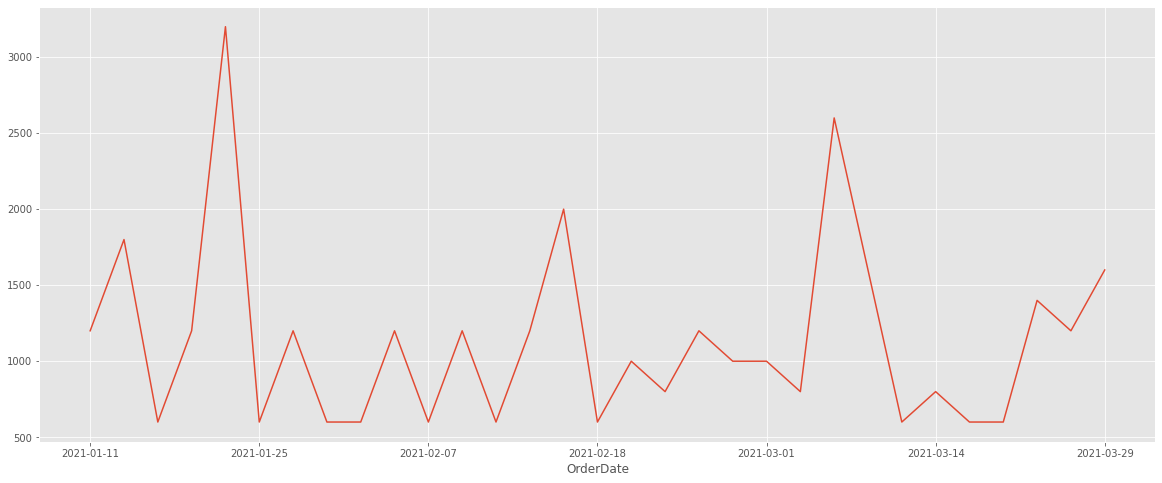

In [700]:
st_ref.plot()

<AxesSubplot:xlabel='OrderDate'>

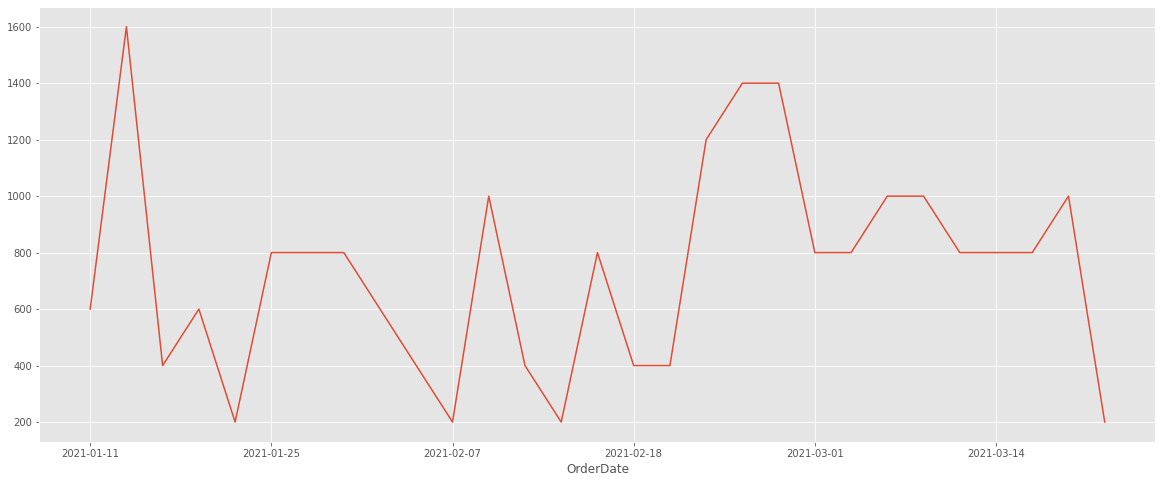

In [701]:
st_fr.plot()

<AxesSubplot:xlabel='OrderDate'>

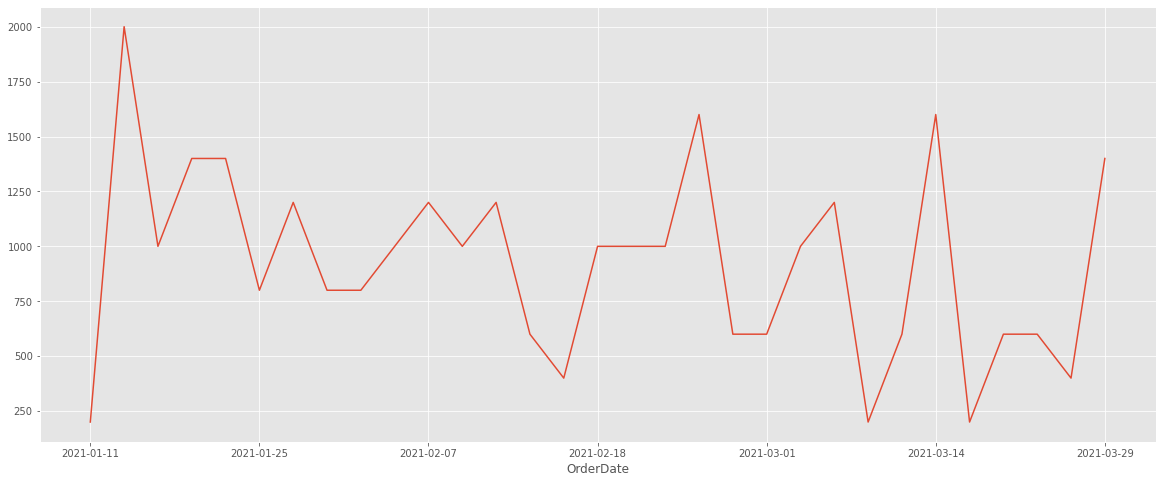

In [702]:
st_sh.plot()

<AxesSubplot:xlabel='OrderDate'>

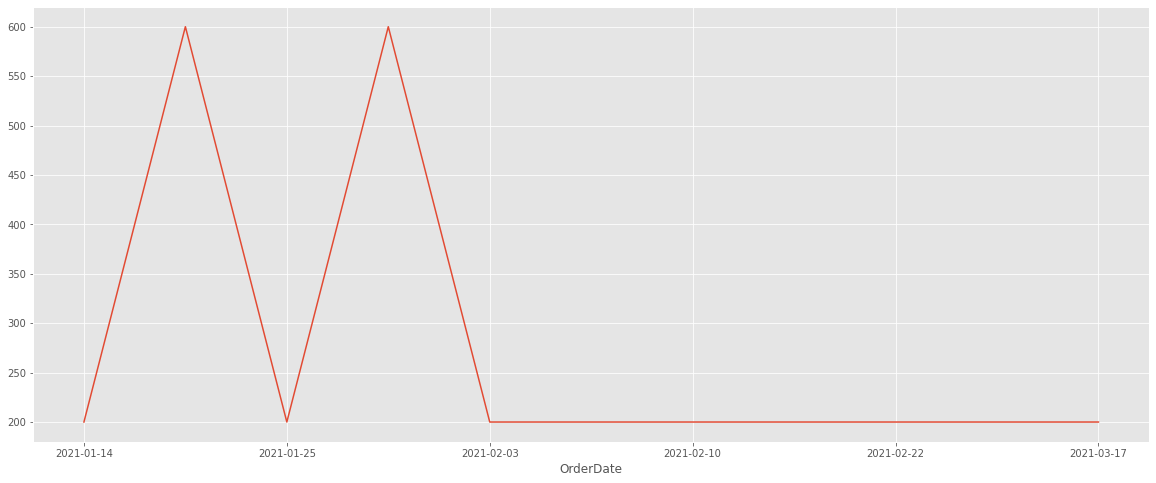

In [703]:
st_th.plot()

In [704]:
st_ref = pd.DataFrame(st_ref)
st_fr = pd.DataFrame(st_fr)
st_sh = pd.DataFrame(st_sh)
st_th = pd.DataFrame(st_th)

In [705]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [706]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+43 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [707]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [708]:
rmse_ref_lrm = lrm_forecast(st_ref, 'OrderTotal')

RMSE:  1000.2305856600248
MAPE:  58.78761119832549


In [709]:
rmse_fr_lrm = lrm_forecast(st_fr, 'OrderTotal')

RMSE:  479.112367954012
MAPE:  93.78070175438599


In [710]:
rmse_sh_lrm = lrm_forecast(st_sh, 'OrderTotal')

RMSE:  562.116586385193
MAPE:  60.42630385487529


In [711]:
rmse_th_lrm = lrm_forecast(st_th, 'OrderTotal')

RMSE:  1043.346264943441
MAPE:  521.4285714285714


In [712]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(1000.2305856600248, 479.112367954012, 562.116586385193, 1043.346264943441)

### ARIMA 

In [713]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [714]:
test_stationarity(st_ref)

Results of Dickey-Fuller Test:
Test Statistic                -5.752973e+00
p-value                        5.907731e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [715]:
test_stationarity(st_fr)

Results of Dickey-Fuller Test:
Test Statistic                 -4.235832
p-value                         0.000573
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64 

Verdict: 
Time Series is Stationary


In [716]:
test_stationarity(st_sh)

Results of Dickey-Fuller Test:
Test Statistic                 -4.151197
p-value                         0.000796
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64 

Verdict: 
Time Series is Stationary


In [717]:
test_stationarity(st_th)

Results of Dickey-Fuller Test:
Test Statistic                 -3.651484
p-value                         0.004850
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [718]:
train = st_ref[0:int(len(st_ref)*0.70)]
test = st_ref[int(len(st_ref)*0.70):]

In [719]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [720]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [721]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",320.720440
6,"(0, 1, 2)",322.070830
13,"(1, 1, 1)",322.160500
21,"(2, 1, 1)",323.899897
7,"(0, 1, 3)",324.047298


In [722]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  614.8531667297816
MAPE:  47.48345568078829


### ARIMA Model for Frozen Goods

In [723]:
train = st_fr[0:int(len(st_fr)*0.70)]
test = st_fr[int(len(st_fr)*0.70):]

In [724]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [725]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",290.169783
13,"(1, 1, 1)",291.940899
12,"(1, 1, 0)",291.984222
6,"(0, 1, 2)",292.036114
20,"(2, 1, 0)",292.970307


In [726]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  358.76233011477683
MAPE:  70.13690273205009


#### ARIMA Model For Shelf Goods

In [727]:
train = st_sh[0:int(len(st_sh)*0.70)]
test = st_sh[int(len(st_sh)*0.70):]

In [728]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [729]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
7,"(0, 1, 3)",305.235079
5,"(0, 1, 1)",305.335108
15,"(1, 1, 3)",306.932514
13,"(1, 1, 1)",306.956156
6,"(0, 1, 2)",306.965681


In [730]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,3)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  552.9936033587257
MAPE:  120.27712328988702


### ARIMA Model For Thawed Goods 

In [731]:
train = st_th[0:int(len(st_th)*0.70)]
test = st_th[int(len(st_th)*0.70):]

In [732]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [733]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
12,"(1, 1, 0)",84.017839
20,"(2, 1, 0)",85.977705
13,"(1, 1, 1)",85.985091
5,"(0, 1, 1)",86.286839
7,"(0, 1, 3)",87.276271


In [734]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (1,1,0)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  2.0097183471152322e-14
MAPE:  7.105427357601002e-15


In [738]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results3_comm = pd.DataFrame({'AGA SOUTH RMSE ARIMA' : rmse_arima, 'AGA SOUTH RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [739]:
results3_comm

,AGA SOUTH RMSE ARIMA,AGA SOUTH RMSE LRM
Refrigerated,6.148532e+02,1000.230586
Frozen,3.587623e+02,479.112368
Shelf,5.529936e+02,562.116586
Thawed,2.009718e-14,1043.346265


### AGA North

In [740]:
nr_ts = df_comm.copy()

In [741]:
nr_ref = nr_ts[(nr_ts['ProductStorage'] == 'REFRIGERATED') & (nr_ts['Location'] == 'AGA North')]
nr_fr = nr_ts[(nr_ts['ProductStorage'] == 'FROZEN') & (nr_ts['Location'] == 'AGA North')]
nr_sh = nr_ts[(nr_ts['ProductStorage'] == 'SHELF') & (nr_ts['Location'] == 'AGA North')]
nr_th = nr_ts[(nr_ts['ProductStorage'] == 'THAWED') & (nr_ts['Location'] == 'AGA North')]

In [742]:
nr_ref = nr_ref.groupby('OrderDate').sum()
nr_fr = nr_fr.groupby('OrderDate').sum()
nr_sh = nr_sh.groupby('OrderDate').sum()
nr_th = nr_th.groupby('OrderDate').sum()

In [743]:
nr_ref = nr_ref['OrderTotal']
nr_fr = nr_fr['OrderTotal']
nr_sh = nr_sh['OrderTotal']
nr_th = nr_th['OrderTotal']

In [744]:
# nr_ref.to_csv('nr_ref.csv')
# nr_fr.to_csv('nr_fr.csv')
# nr_sh.to_csv('nr_sh.csv')
# nr_th.to_csv('nr_th.csv')

<AxesSubplot:xlabel='OrderDate'>

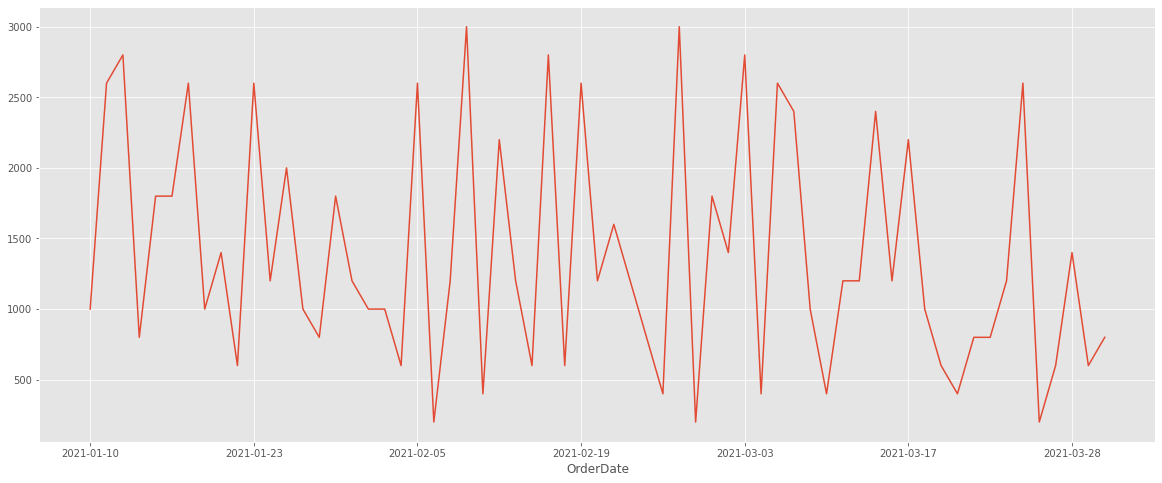

In [745]:
nr_ref.plot()

<AxesSubplot:xlabel='OrderDate'>

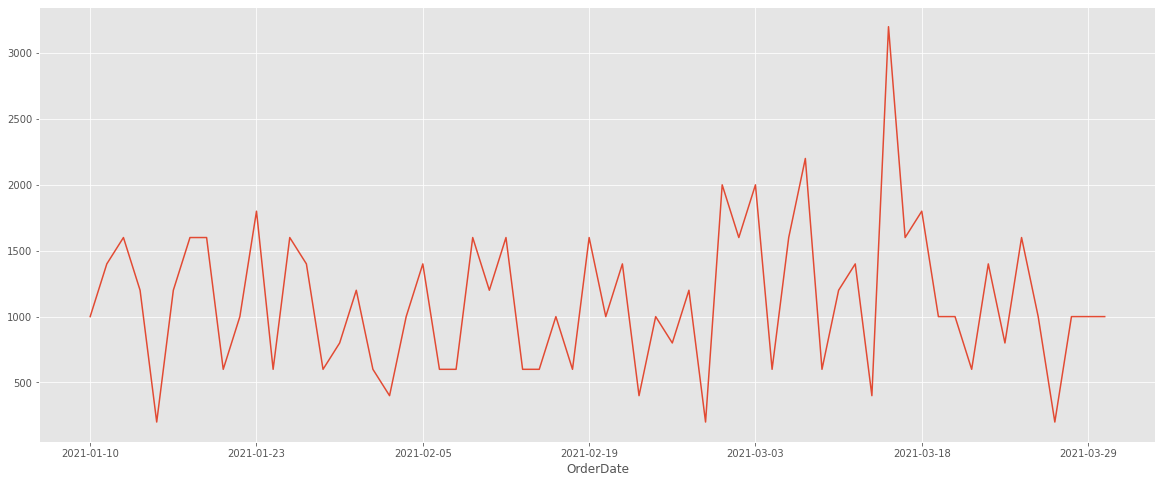

In [746]:
nr_fr.plot()

<AxesSubplot:xlabel='OrderDate'>

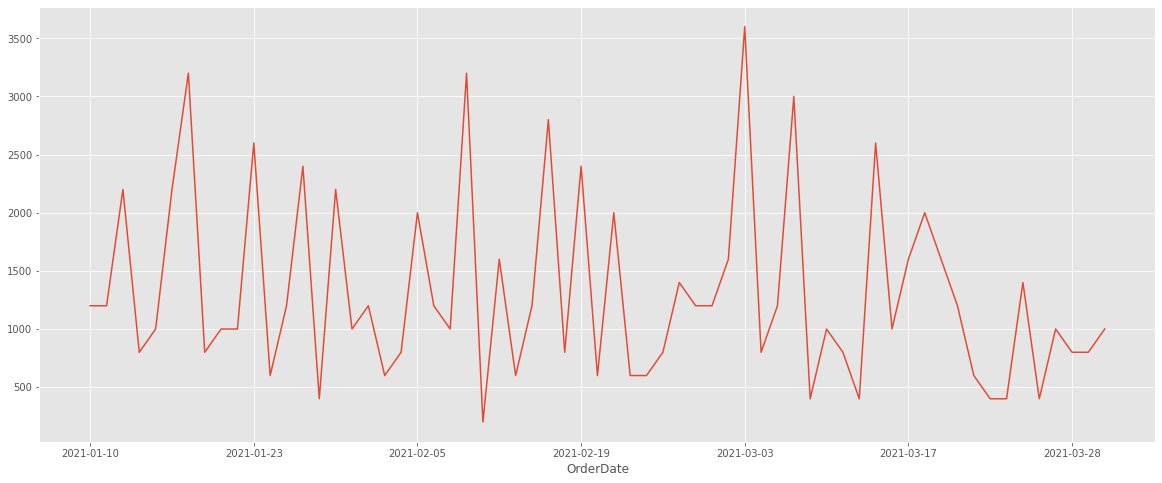

In [747]:
nr_sh.plot()

<AxesSubplot:xlabel='OrderDate'>

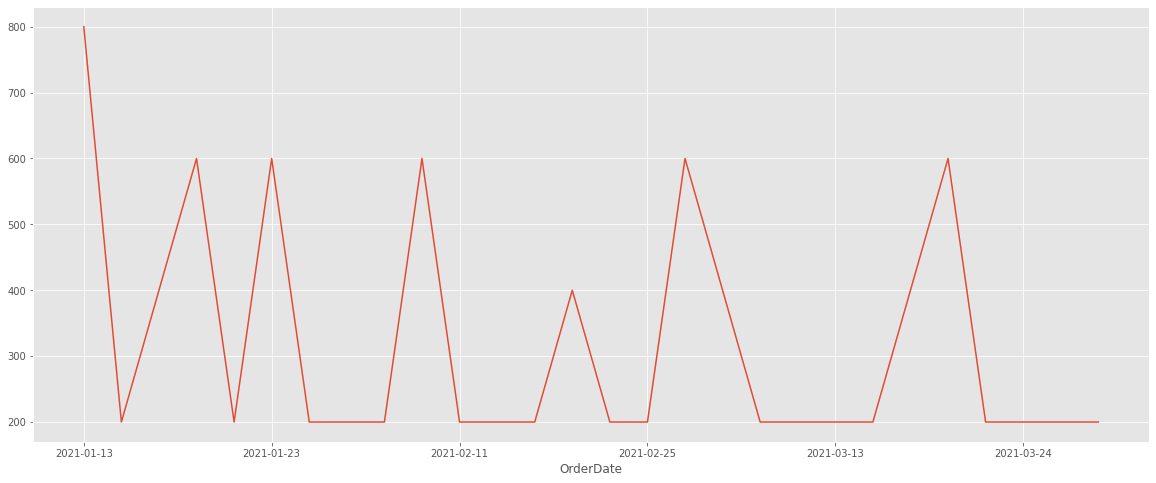

In [748]:
nr_th.plot()

In [749]:
nr_ref = pd.DataFrame(nr_ref)
nr_fr = pd.DataFrame(nr_fr)
nr_sh = pd.DataFrame(nr_sh)
nr_th = pd.DataFrame(nr_th)

In [750]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [751]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+43 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [752]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [753]:
rmse_ref_lrm = lrm_forecast(nr_ref, 'OrderTotal')

RMSE:  773.7398757780396
MAPE:  117.33666081702133


In [754]:
rmse_fr_lrm = lrm_forecast(nr_fr, 'OrderTotal')

RMSE:  678.8191398962525
MAPE:  61.70861137243134


In [755]:
rmse_sh_lrm = lrm_forecast(nr_sh, 'OrderTotal')

RMSE:  778.4695691276465
MAPE:  113.8877581007324


In [756]:
rmse_th_lrm = lrm_forecast(nr_th, 'OrderTotal')

RMSE:  312.99268333538333
MAPE:  107.29694606887593


In [757]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(773.7398757780396, 678.8191398962525, 778.4695691276465, 312.99268333538333)

### ARIMA 

In [758]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [759]:
test_stationarity(nr_ref)

Results of Dickey-Fuller Test:
Test Statistic                -1.047642e+01
p-value                        1.245665e-18
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [760]:
test_stationarity(nr_fr)

Results of Dickey-Fuller Test:
Test Statistic                -8.467055e+00
p-value                        1.512541e-13
#Lags Used                     0.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [761]:
test_stationarity(nr_sh)

Results of Dickey-Fuller Test:
Test Statistic                -9.694397e+00
p-value                        1.114323e-16
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [762]:
test_stationarity(nr_th)

Results of Dickey-Fuller Test:
Test Statistic                 -4.644583
p-value                         0.000107
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [763]:
train = nr_ref[0:int(len(nr_ref)*0.70)]
test = nr_ref[int(len(nr_ref)*0.70):]

In [764]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [765]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [766]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
6,"(0, 1, 2)",705.354669
13,"(1, 1, 1)",705.411186
7,"(0, 1, 3)",706.330262
21,"(2, 1, 1)",706.637484
14,"(1, 1, 2)",706.783422


In [767]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,2)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  1099.3671428305126
MAPE:  175.35405846196858


### ARIMA Model for Frozen Goods

In [768]:
train = nr_fr[0:int(len(nr_fr)*0.70)]
test = nr_fr[int(len(nr_fr)*0.70):]

In [769]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [770]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",647.437266
6,"(0, 1, 2)",648.923081
13,"(1, 1, 1)",648.991834
14,"(1, 1, 2)",649.734264
7,"(0, 1, 3)",650.764389


In [771]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  682.3827239884827
MAPE:  59.44018121487263


#### ARIMA Model For Shelf Goods

In [772]:
train = nr_sh[0:int(len(nr_sh)*0.70)]
test = nr_sh[int(len(nr_sh)*0.70):]

In [773]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [774]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
6,"(0, 1, 2)",708.289324
13,"(1, 1, 1)",708.774023
21,"(2, 1, 1)",710.102893
7,"(0, 1, 3)",710.262906
14,"(1, 1, 2)",710.271227


In [775]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,2)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  678.0516813724042
MAPE:  94.21140136144626


### ARIMA Model For Thawed Goods 

In [776]:
train = nr_th[0:int(len(nr_th)*0.70)]
test = nr_th[int(len(nr_th)*0.70):]

In [777]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [778]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
6,"(0, 1, 2)",245.631653
7,"(0, 1, 3)",246.905586
5,"(0, 1, 1)",247.934391
13,"(1, 1, 1)",248.338260
21,"(2, 1, 1)",248.720655


In [779]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,2)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  220.73109781613127
MAPE:  98.49787519780726


In [780]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results4_comm = pd.DataFrame({'AGA NORTH RMSE ARIMA' : rmse_arima, 'AGA NORTH RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [781]:
results4_comm

,AGA NORTH RMSE ARIMA,AGA NORTH RMSE LRM
Refrigerated,1099.367143,773.739876
Frozen,682.382724,678.819140
Shelf,678.051681,778.469569
Thawed,220.731098,312.992683


### AGA HQ

In [782]:
hq_ts = df_comm.copy()

In [783]:
hq_ref = hq_ts[(hq_ts['ProductStorage'] == 'REFRIGERATED') & (hq_ts['Location'] == 'AGA HQ')]
hq_fr = hq_ts[(hq_ts['ProductStorage'] == 'FROZEN') & (hq_ts['Location'] == 'AGA HQ')]
hq_sh = hq_ts[(hq_ts['ProductStorage'] == 'SHELF') & (hq_ts['Location'] == 'AGA HQ')]
hq_th = hq_ts[(hq_ts['ProductStorage'] == 'THAWED') & (hq_ts['Location'] == 'AGA HQ')]

In [784]:
hq_ref = hq_ref.groupby('OrderDate').sum()
hq_fr = hq_fr.groupby('OrderDate').sum()
hq_sh = hq_sh.groupby('OrderDate').sum()
hq_th = hq_th.groupby('OrderDate').sum()

In [785]:
hq_ref = hq_ref['OrderTotal']
hq_fr = hq_fr['OrderTotal']
hq_sh = hq_sh['OrderTotal']
hq_th = hq_th['OrderTotal']

In [786]:
# hq_ref.to_csv('hq_ref.csv')
# hq_fr.to_csv('hq_fr.csv')
# hq_sh.to_csv('hq_sh.csv')
# hq_th.to_csv('hq_th.csv')

<AxesSubplot:xlabel='OrderDate'>

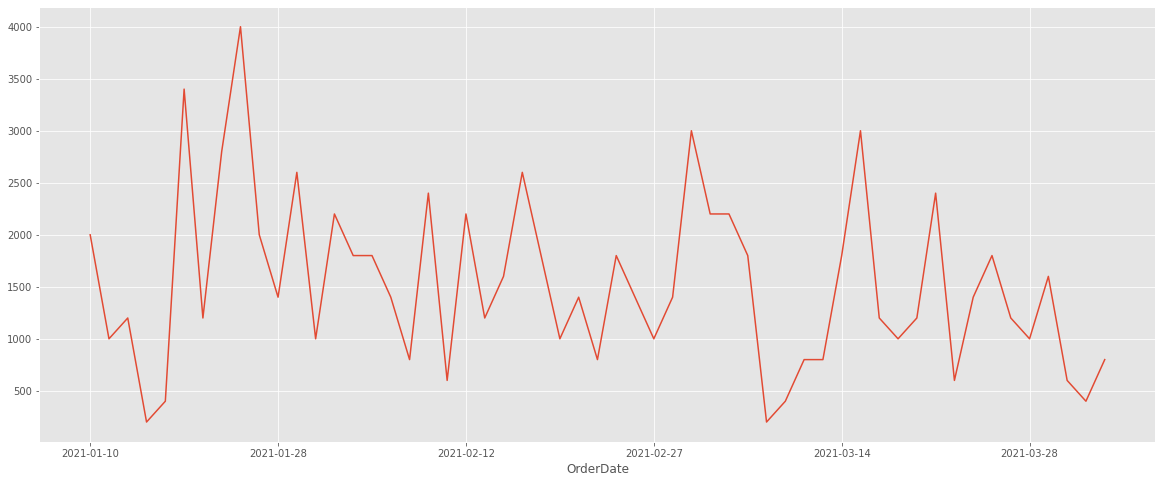

In [787]:
hq_ref.plot()

<AxesSubplot:xlabel='OrderDate'>

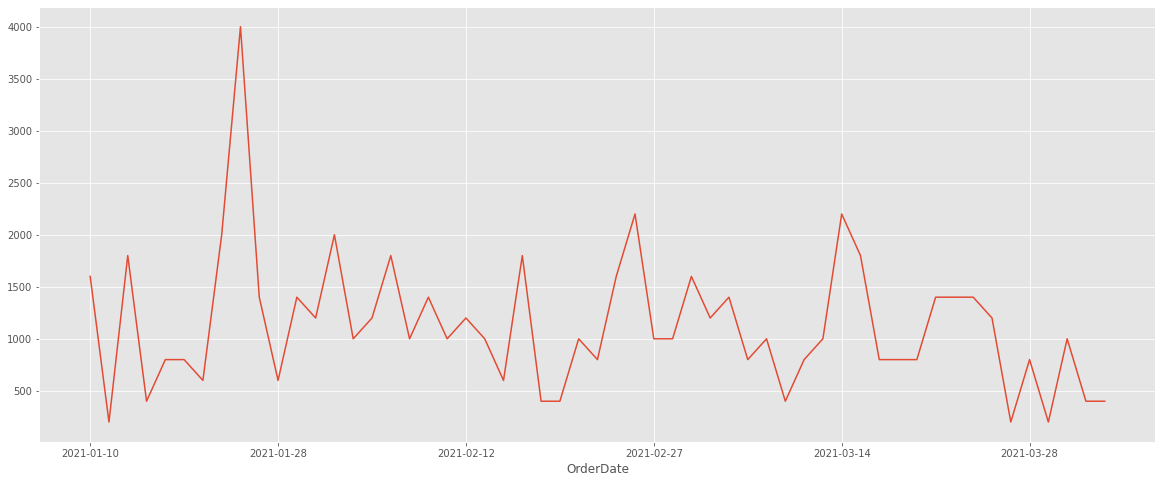

In [788]:
hq_fr.plot()

<AxesSubplot:xlabel='OrderDate'>

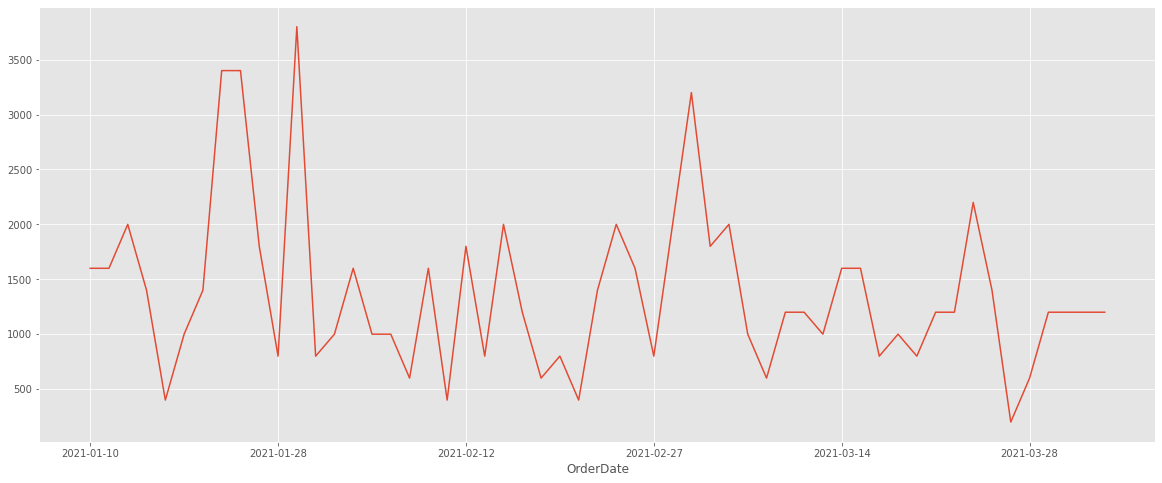

In [789]:
hq_sh.plot()

<AxesSubplot:xlabel='OrderDate'>

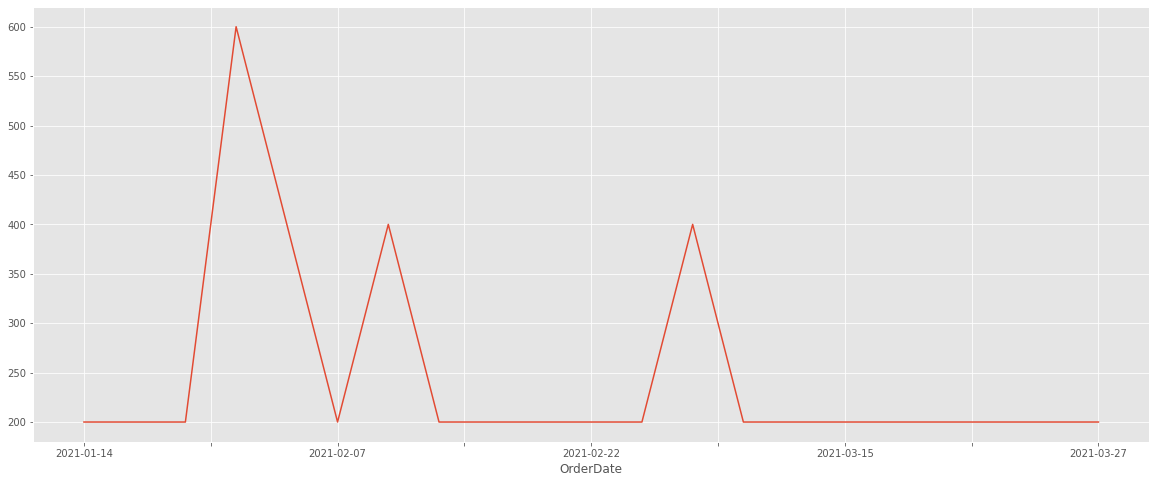

In [790]:
hq_th.plot()

In [791]:
hq_ref = pd.DataFrame(hq_ref)
hq_fr = pd.DataFrame(hq_fr)
hq_sh = pd.DataFrame(hq_sh)
hq_th = pd.DataFrame(hq_th)

In [792]:
def train_test_split(df):    
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    return train, test

In [793]:
def lrm_forecast(df, col): 
    train = df[0:int(len(df)*0.70)]
    test = df[int(len(df)*0.70):]
    
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+43 for i in range(len(test))]
    
    lrm_train = train.copy()
    lrm_test = test.copy()
        
    lrm_train['time'] = train_time
    lrm_test['time'] = test_time
    
    lrm = LinearRegression()
    lrm.fit(lrm_train[['time']], lrm_train[col])
    
    lrm_pred = lrm.predict(lrm_test[['time']])
    lrm_rmse = report(lrm_test[col], lrm_pred)
    
    return lrm_rmse

In [794]:
def report(y_train, y_pred):
    rmse = metrics.mean_squared_error(y_train, y_pred, squared = False)
    mape = metrics.mean_absolute_percentage_error(y_train, y_pred) * 100
    print('RMSE: ', rmse)
    print('MAPE: ', mape)
    return rmse

In [795]:
rmse_ref_lrm = lrm_forecast(hq_ref, 'OrderTotal')

RMSE:  653.2705649296887
MAPE:  55.835310270294784


In [796]:
rmse_fr_lrm = lrm_forecast(hq_fr, 'OrderTotal')

RMSE:  513.4766587881096
MAPE:  79.82061602804636


In [797]:
rmse_sh_lrm = lrm_forecast(hq_sh, 'OrderTotal')

RMSE:  424.03326205741047
MAPE:  50.4562321203188


In [798]:
rmse_th_lrm = lrm_forecast(hq_th, 'OrderTotal')

RMSE:  81.26520368096082
MAPE:  40.439560439560424


In [799]:
RMSE_LRM = rmse_ref_lrm, rmse_fr_lrm, rmse_sh_lrm, rmse_th_lrm
RMSE_LRM

(653.2705649296887, 513.4766587881096, 424.03326205741047, 81.26520368096082)

### ARIMA 

In [800]:
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    print('Verdict: ')
    if dftest[1] < 0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

In [801]:
test_stationarity(hq_ref)

Results of Dickey-Fuller Test:
Test Statistic                -6.253969e+00
p-value                        4.384656e-08
#Lags Used                     0.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [802]:
test_stationarity(hq_fr)

Results of Dickey-Fuller Test:
Test Statistic                -6.045912e+00
p-value                        1.312052e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [803]:
test_stationarity(hq_sh)

Results of Dickey-Fuller Test:
Test Statistic                -5.912161e+00
p-value                        2.623336e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64 

Verdict: 
Time Series is Stationary


In [804]:
test_stationarity(hq_th)

Results of Dickey-Fuller Test:
Test Statistic                 -3.061962
p-value                         0.029499
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64 

Verdict: 
Time Series is Stationary


## ARIMA model for Refrigerated Goods

In [805]:
train = hq_ref[0:int(len(hq_ref)*0.70)]
test = hq_ref[int(len(hq_ref)*0.70):]

In [806]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [807]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [808]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",613.266331
13,"(1, 1, 1)",614.854460
6,"(0, 1, 2)",614.908240
23,"(2, 1, 3)",616.112553
14,"(1, 1, 2)",616.120662


In [809]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_ref = report(test, ARIMA_predict)

RMSE:  747.2515600849002
MAPE:  76.16915256080645


### ARIMA Model for Frozen Goods

In [810]:
train = hq_fr[0:int(len(hq_fr)*0.70)]
test = hq_fr[int(len(hq_fr)*0.70):]

In [811]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [812]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",595.366246
6,"(0, 1, 2)",596.973413
13,"(1, 1, 1)",597.027985
7,"(0, 1, 3)",598.756191
21,"(2, 1, 1)",598.820676


In [813]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_fr = report(test, ARIMA_predict)

RMSE:  572.180188804498
MAPE:  105.4331469888513


#### ARIMA Model For Shelf Goods

In [814]:
train = hq_sh[0:int(len(hq_sh)*0.70)]
test = hq_sh[int(len(hq_sh)*0.70):]

In [815]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)

In [816]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",611.871846
13,"(1, 1, 1)",612.604681
6,"(0, 1, 2)",612.625245
14,"(1, 1, 2)",613.716426
7,"(0, 1, 3)",614.600878


In [817]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_sh = report(test, ARIMA_predict)

RMSE:  520.5137489372372
MAPE:  72.06501275930731


### ARIMA Model For Thawed Goods 

In [818]:
train = hq_th[0:int(len(hq_th)*0.70)]
test = hq_th[int(len(hq_th)*0.70):]

In [819]:
ARIMA_AIC = pd.DataFrame(columns =  ['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['OrderTotal'].values, order = param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param' : param, 'AIC' : ARIMA_model.aic }, ignore_index = True)


In [820]:
ARIMA_AIC.sort_values('AIC',ascending=True).head()

,param,AIC
5,"(0, 1, 1)",169.431073
13,"(1, 1, 1)",171.323000
20,"(2, 1, 0)",172.503872
14,"(1, 1, 2)",172.762981
12,"(1, 1, 0)",172.889359


In [821]:
ARIMA_model = ARIMA(train['OrderTotal'].values, order = (0,1,1)).fit()
ARIMA_predict = ARIMA_model.forecast(len(test))
rmse_th = report(test, ARIMA_predict)

RMSE:  71.10306064921554
MAPE:  35.55153032460777


In [822]:
rmse_arima = [rmse_ref, rmse_fr, rmse_sh, rmse_th]
results5_comm = pd.DataFrame({'AGA HQ RMSE ARIMA' : rmse_arima, 'AGA HQ RMSE LRM' : RMSE_LRM}, index = ['Refrigerated', 'Frozen', 'Shelf', 'Thawed'])

In [823]:
results5_comm

,AGA HQ RMSE ARIMA,AGA HQ RMSE LRM
Refrigerated,747.251560,653.270565
Frozen,572.180189,513.476659
Shelf,520.513749,424.033262
Thawed,71.103061,81.265204


In [824]:
tot_results_comm=pd.concat([results1_comm,results2_comm,results3_comm,results4_comm,results5_comm], axis=1)

In [825]:
tot_results_comm

,AGA WEST RMSE ARIMA,AGA WEST RMSE LRM,AGA EAST RMSE ARIMA,AGA EAST RMSE LRM,AGA SOUTH RMSE ARIMA,AGA SOUTH RMSE LRM,AGA NORTH RMSE ARIMA,AGA NORTH RMSE LRM,AGA HQ RMSE ARIMA,AGA HQ RMSE LRM
Refrigerated,831.078664,941.119397,652.499755,765.809430,6.148532e+02,1000.230586,1099.367143,773.739876,747.251560,653.270565
Frozen,644.816936,688.872913,549.940797,541.589518,3.587623e+02,479.112368,682.382724,678.819140,572.180189,513.476659
Shelf,1049.043198,981.452755,698.927522,736.343005,5.529936e+02,562.116586,678.051681,778.469569,520.513749,424.033262
Thawed,163.299316,220.234281,106.904497,105.108458,2.009718e-14,1043.346265,220.731098,312.992683,71.103061,81.265204
